## Load necessary library

In [ ]:
# load necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')



## Data Exploration

In [ ]:
# Read the loan csv file
data_loan = pd.read_csv('/content/loan.csv')
data_loan.head(10)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
6,1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
7,1072053,1288686,3000,3000,3000.0,36 months,18.64%,109.43,E,E1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
8,1071795,1306957,5600,5600,5600.0,60 months,21.28%,152.39,F,F2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
9,1071570,1306721,5375,5375,5350.0,60 months,12.69%,121.45,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [ ]:
data_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [ ]:
data_loan.size

4408587

In [ ]:
data_loan.shape

(39717, 111)

# Data Cleaning

### Check for duplicate rows

In [ ]:
# Check for duplicate rows in dataset based on id column

print(data_loan.duplicated(subset=None, keep='first').count())
dup=data_loan[data_loan.duplicated(['id'])]
dup


39717


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit


#### Observation: No duplicate rows in loan dataset

### Check null values

In [ ]:
# To find the null values
data_loan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64


#### Observation : From above as we can see there are many attributes with null values. So we have to remove this attributes



### Drop columns which has only null values

In [ ]:
data_loan.dropna(axis = 1, how = 'all', inplace = True)
data_loan.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [ ]:
#To find how many null values are still present in dataset
data_loan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

### Check unique values and remove column with single value

In [ ]:
#Finding number of unique values in each vcolumn
data_loan.nunique().sort_values().head(15)

tax_liens                     1
delinq_amnt                   1
chargeoff_within_12_mths      1
acc_now_delinq                1
application_type              1
policy_code                   1
collections_12_mths_ex_med    1
pymnt_plan                    1
initial_list_status           1
term                          2
next_pymnt_d                  2
pub_rec_bankruptcies          3
loan_status                   3
verification_status           3
pub_rec                       5
dtype: int64

In [ ]:
data_loan.drop(['pymnt_plan', "initial_list_status",'collections_12_mths_ex_med','policy_code','acc_now_delinq', 'application_type', 'pub_rec_bankruptcies', 'tax_liens', 'delinq_amnt'], axis = 1, inplace = True)
data_loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,chargeoff_within_12_mths
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.0


In [ ]:
data_loan.shape

(39717, 48)

#### Observation :  After cleaning the data we are now remained with 48 columns out of 111 columns

The company wants to know which loan applications are risky. Therefore, the fields that are created after a loan application is approved doesn't make sense for our analysis towards the business objective.

Secondly, fields like id, member_id & url are different for each application. zip_code could have been a useful driver, but it contains only partial data which might impute our analysis negatively. Therefore, let us drop all these columns mentioned below

## Remove irrelevant columns

In [ ]:
data_loan.drop(["id", "member_id", "url", "title", "emp_title", "zip_code", "last_credit_pull_d", "addr_state","desc","out_prncp_inv","total_pymnt_inv","funded_amnt", "delinq_2yrs", "revol_bal", "out_prncp", "total_pymnt", "total_rec_prncp", "total_rec_int", "total_rec_late_fee", "recoveries", "collection_recovery_fee", "last_pymnt_d", "last_pymnt_amnt", "next_pymnt_d" , "chargeoff_within_12_mths", "mths_since_last_delinq", "mths_since_last_record"], axis = 1, inplace = True)


In [ ]:
#After dropping the above columns,Checking the shape
data_loan.shape

(39717, 21)

In [ ]:
data_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            39717 non-null  int64  
 1   funded_amnt_inv      39717 non-null  float64
 2   term                 39717 non-null  object 
 3   int_rate             39717 non-null  object 
 4   installment          39717 non-null  float64
 5   grade                39717 non-null  object 
 6   sub_grade            39717 non-null  object 
 7   emp_length           38642 non-null  object 
 8   home_ownership       39717 non-null  object 
 9   annual_inc           39717 non-null  float64
 10  verification_status  39717 non-null  object 
 11  issue_d              39717 non-null  object 
 12  loan_status          39717 non-null  object 
 13  purpose              39717 non-null  object 
 14  dti                  39717 non-null  float64
 15  earliest_cr_line     39717 non-null 

In [ ]:
data_loan.head(10)

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,issue_d,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc
0,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,...,Dec-11,Fully Paid,credit_card,27.65,Jan-85,1,3,0,83.70%,9
1,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,...,Dec-11,Charged Off,car,1.00,Apr-99,5,3,0,9.40%,4
2,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,...,Dec-11,Fully Paid,small_business,8.72,Nov-01,2,2,0,98.50%,10
3,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,...,Dec-11,Fully Paid,other,20.00,Feb-96,1,10,0,21%,37
4,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,...,Dec-11,Current,other,17.94,Jan-96,0,15,0,53.90%,38
5,5000,5000.0,36 months,7.90%,156.46,A,A4,3 years,RENT,36000.0,...,Dec-11,Fully Paid,wedding,11.20,Nov-04,3,9,0,28.30%,12
6,7000,7000.0,60 months,15.96%,170.08,C,C5,8 years,RENT,47004.0,...,Dec-11,Fully Paid,debt_consolidation,23.51,Jul-05,1,7,0,85.60%,11
7,3000,3000.0,36 months,18.64%,109.43,E,E1,9 years,RENT,48000.0,...,Dec-11,Fully Paid,car,5.35,Jan-07,2,4,0,87.50%,4
8,5600,5600.0,60 months,21.28%,152.39,F,F2,4 years,OWN,40000.0,...,Dec-11,Charged Off,small_business,5.55,Apr-04,2,11,0,32.60%,13
9,5375,5350.0,60 months,12.69%,121.45,B,B5,< 1 year,RENT,15000.0,...,Dec-11,Charged Off,other,18.08,Sep-04,0,2,0,36.50%,3


#### In Loan Status Column we have 3 distict values like Fully Paid ,ChargedOff and current  out of them we need only Fully Paid ,ChargedOff. So, we will remove the rows with Current values in loan status.

In [ ]:
data_loan = data_loan[data_loan.loan_status != "Current"]
data_loan.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

## Checking missing values


In [ ]:
#null value sum and then divide it by len of data_loan.index
(data_loan.isna().sum()/len(data_loan.index))*100

loan_amnt              0.000000
funded_amnt_inv        0.000000
term                   0.000000
int_rate               0.000000
installment            0.000000
grade                  0.000000
sub_grade              0.000000
emp_length             2.677761
home_ownership         0.000000
annual_inc             0.000000
verification_status    0.000000
issue_d                0.000000
loan_status            0.000000
purpose                0.000000
dti                    0.000000
earliest_cr_line       0.000000
inq_last_6mths         0.000000
open_acc               0.000000
pub_rec                0.000000
revol_util             0.129611
total_acc              0.000000
dtype: float64

From above info there are two columns emp_length and revolt_util which have missing values

In [ ]:
data_loan.describe()

,loan_amnt,funded_amnt_inv,installment,annual_inc,dti,inq_last_6mths,open_acc,pub_rec,total_acc
count,38577.000000,38577.000000,38577.000000,3.857700e+04,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000
mean,11047.025430,10222.481123,322.466318,6.877797e+04,13.272727,0.871737,9.275423,0.055422,22.052648
std,7348.441646,7022.720644,208.639215,6.421868e+04,6.673044,1.071546,4.401588,0.237804,11.425861
min,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,2.000000,0.000000,2.000000
25%,5300.000000,5000.000000,165.740000,4.000000e+04,8.130000,0.000000,6.000000,0.000000,13.000000
50%,9600.000000,8733.440000,277.860000,5.886800e+04,13.370000,1.000000,9.000000,0.000000,20.000000
75%,15000.000000,14000.000000,425.550000,8.200000e+04,18.560000,1.000000,12.000000,0.000000,29.000000
max,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,8.000000,44.000000,4.000000,90.000000


In [ ]:
print("Mode : " + data_loan.emp_length.mode()[0])
data_loan.emp_length.value_counts()

Mode : 10+ years


10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

### Observation : The above value counts shows that the mode value has far higher frequency than that of the next most frequent value.

1.This means that we can safely assign the value of mode to the null values in the column.

2.Also the missing values are in very low percentage. So imputung with mode value doesnt affect the analysis much.

In [ ]:
data_loan.emp_length.fillna(data_loan.emp_length.mode()[0], inplace = True)
data_loan.emp_length.isna().sum()

0

In [ ]:
data_loan.dropna(axis = 0, subset = ['revol_util'] , inplace = True)
data_loan.revol_util.isna().sum()

0

## Standardizing the data


In [ ]:
# Data cleaning
# Lets remove % symbol from intrest rate column so that it can be used in calculations
data_loan['int_rate'] = data_loan['int_rate'].str.rstrip('%')

# Lets remove % symbol from revol_util column so that it can be used in calculations
data_loan['revol_util'] = data_loan['revol_util'].str.rstrip('%')

In [ ]:
data_loan.emp_length = pd.to_numeric(data_loan.emp_length.apply(lambda x: 0 if "<" in x else (x.split('+')[0] if "+" in x else x.split()[0])))

In [ ]:
data_loan.head(10)

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,issue_d,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc
0,5000,4975.0,36 months,10.65,162.87,B,B2,10,RENT,24000.0,...,Dec-11,Fully Paid,credit_card,27.65,Jan-85,1,3,0,83.70,9
1,2500,2500.0,60 months,15.27,59.83,C,C4,0,RENT,30000.0,...,Dec-11,Charged Off,car,1.00,Apr-99,5,3,0,9.40,4
2,2400,2400.0,36 months,15.96,84.33,C,C5,10,RENT,12252.0,...,Dec-11,Fully Paid,small_business,8.72,Nov-01,2,2,0,98.50,10
3,10000,10000.0,36 months,13.49,339.31,C,C1,10,RENT,49200.0,...,Dec-11,Fully Paid,other,20.00,Feb-96,1,10,0,21,37
5,5000,5000.0,36 months,7.90,156.46,A,A4,3,RENT,36000.0,...,Dec-11,Fully Paid,wedding,11.20,Nov-04,3,9,0,28.30,12
6,7000,7000.0,60 months,15.96,170.08,C,C5,8,RENT,47004.0,...,Dec-11,Fully Paid,debt_consolidation,23.51,Jul-05,1,7,0,85.60,11
7,3000,3000.0,36 months,18.64,109.43,E,E1,9,RENT,48000.0,...,Dec-11,Fully Paid,car,5.35,Jan-07,2,4,0,87.50,4
8,5600,5600.0,60 months,21.28,152.39,F,F2,4,OWN,40000.0,...,Dec-11,Charged Off,small_business,5.55,Apr-04,2,11,0,32.60,13
9,5375,5350.0,60 months,12.69,121.45,B,B5,0,RENT,15000.0,...,Dec-11,Charged Off,other,18.08,Sep-04,0,2,0,36.50,3
10,6500,6500.0,60 months,14.65,153.45,C,C3,5,OWN,72000.0,...,Dec-11,Fully Paid,debt_consolidation,16.12,Jan-98,2,14,0,20.60,23


In [ ]:
loan_col = ['revol_util','int_rate']
data_loan[loan_col] = data_loan[loan_col].apply(pd.to_numeric)

In [ ]:
data_loan.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,issue_d,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc
0,5000,4975.0,36 months,10.65,162.87,B,B2,10,RENT,24000.0,...,Dec-11,Fully Paid,credit_card,27.65,Jan-85,1,3,0,83.7,9
1,2500,2500.0,60 months,15.27,59.83,C,C4,0,RENT,30000.0,...,Dec-11,Charged Off,car,1.00,Apr-99,5,3,0,9.4,4
2,2400,2400.0,36 months,15.96,84.33,C,C5,10,RENT,12252.0,...,Dec-11,Fully Paid,small_business,8.72,Nov-01,2,2,0,98.5,10
3,10000,10000.0,36 months,13.49,339.31,C,C1,10,RENT,49200.0,...,Dec-11,Fully Paid,other,20.00,Feb-96,1,10,0,21.0,37
5,5000,5000.0,36 months,7.90,156.46,A,A4,3,RENT,36000.0,...,Dec-11,Fully Paid,wedding,11.20,Nov-04,3,9,0,28.3,12


# Univariant Analysis

## Loan Amount

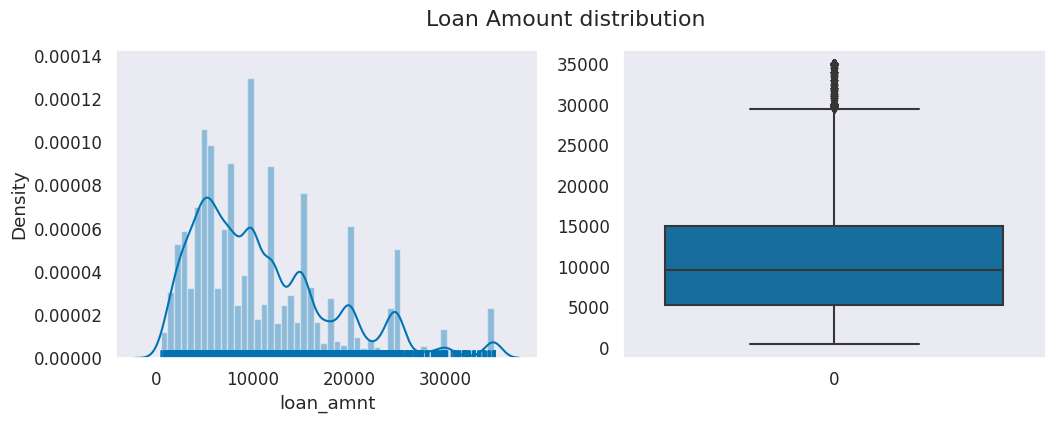

In [ ]:
#Increasing the figure size of plot
plt.figure(figsize=(12,4))
#Setting subplot index
plt.subplot(1,2,1)
#Histogram plot
sns.distplot(a=data_loan.loan_amnt, rug=True)
plt.subplot(1,2,2)
#Box plot
sns.boxplot(data=data_loan.loan_amnt)
#Single title for both subplots.
plt.suptitle('Loan Amount distribution')
plt.show()

In [ ]:
#Stats of loan amount
data_loan.loan_amnt.describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

count    38527.000000
mean     11055.265139
std       7348.433587
min        500.000000
5%        2400.000000
10%       3125.000000
25%       5325.000000
50%       9600.000000
75%      15000.000000
90%      21600.000000
95%      25000.000000
99%      35000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

## Annual Income

<Axes: >

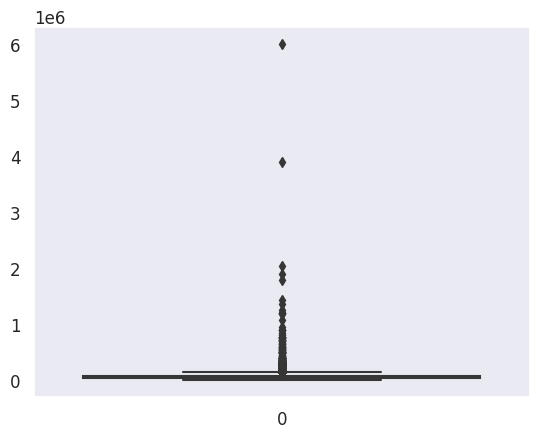

In [ ]:
sns.boxplot(data_loan['annual_inc'])

#### Observation  Clearly indicating the presence of outliers.
So, Removing them.
Let's see the quantile info and take an appropriate action.
The values after 95 percentile seems to be disconected from the general distribution and also there is huge increase in the value for small quantile variation.
So, considering threshold for removing outliers as 0.95

In [ ]:
quantile_dist = data_loan.annual_inc.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
quantile_dist

0.50     59000.0
0.75     82000.0
0.90    115000.0
0.95    140004.0
0.97    165000.0
0.98    187000.0
0.99    234000.0
Name: annual_inc, dtype: float64

### Remove outlier

In [ ]:
per_95_annual_inc = data_loan['annual_inc'].quantile(0.95)
data_loan = data_loan[data_loan.annual_inc <= per_95_annual_inc]

<Axes: >

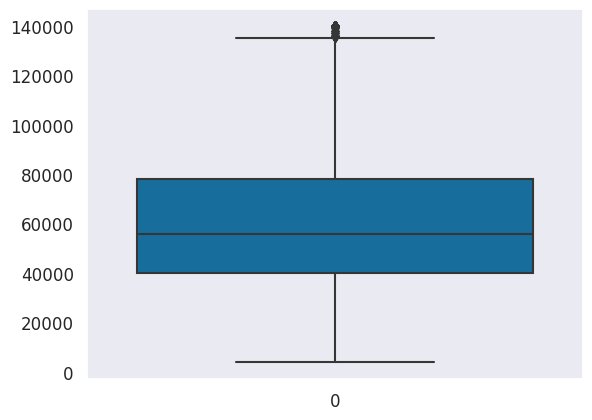

In [ ]:
sns.boxplot(data_loan.annual_inc)

## DTI


<Axes: >

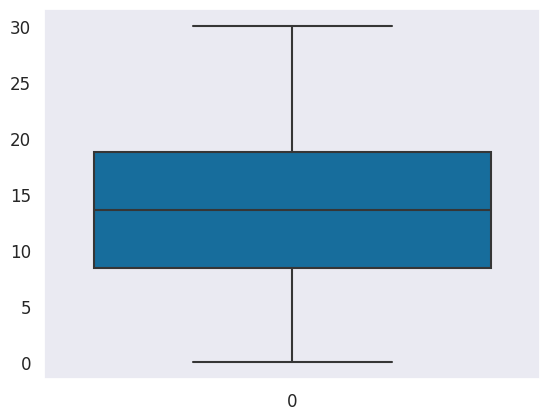

In [ ]:
sns.boxplot(data_loan['dti'])

In [ ]:
data_loan.dti.describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

count    36606.000000
mean        13.450146
std          6.660418
min          0.000000
5%           2.212500
10%          4.170000
25%          8.350000
50%         13.580000
75%         18.720000
90%         22.390000
95%         23.860000
99%         26.659000
max         29.990000
Name: dti, dtype: float64

## funded_amnt_inv - The total amount committed by investors for that loan at that point in time.

<Axes: >

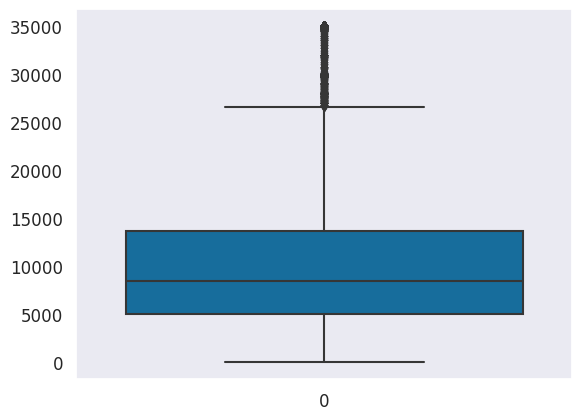

In [ ]:
sns.boxplot(data_loan['funded_amnt_inv'])

In [ ]:
data_loan.funded_amnt_inv.describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

count    36606.000000
mean      9902.311039
std       6730.696329
min          0.000000
5%        1800.000000
10%       2800.000000
25%       4988.276705
50%       8396.342174
75%      13649.999283
90%      19750.000000
95%      23949.287805
99%      31966.803281
max      35000.000000
Name: funded_amnt_inv, dtype: float64

####  Observation : By analysis other variables like dti,loan_amnt,funded_amt_inv also have some values far from distribution, the distribution is pretty continousand there is no need to remove outliers for these above columns.

## int_rate

In [ ]:
data_loan['int_rate'].describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

count    36606.000000
mean        11.883216
std          3.666065
min          5.420000
5%           6.170000
10%          6.990000
25%          8.940000
50%         11.710000
75%         14.270000
90%         16.770000
95%         18.250000
99%         20.890000
max         24.400000
Name: int_rate, dtype: float64

<Axes: >

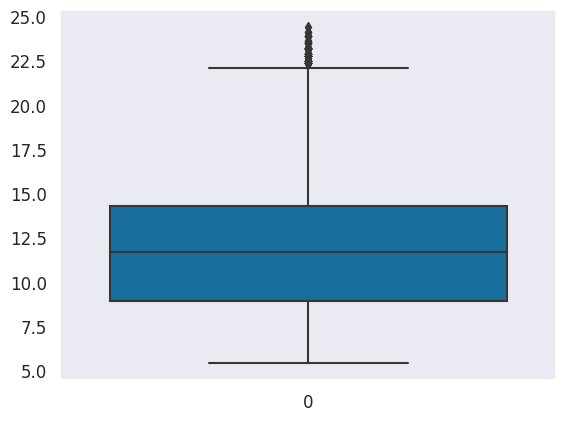

In [ ]:
sns.boxplot(data_loan['int_rate'])

### Observation : Average intrest rate is 12 % ,after 75% percentile interest rate zoom'ed to 25% from 15%.

## Analyse distribution of three loan amount fields

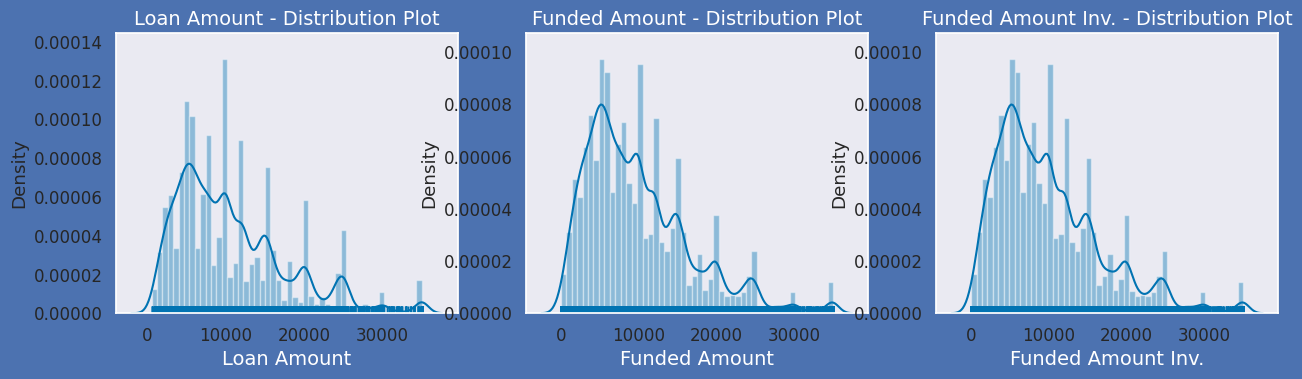

In [ ]:
# Lets see distribution of three loan amount fields using distribution plot.
# Quantitative Variables

plt.figure(figsize=(15,8),facecolor='b')
sns.set_style("dark")
# subplot 1
plt.subplot(2, 3, 1)
ax = sns.distplot(data_loan['loan_amnt'],rug = True)
ax.set_title('Loan Amount - Distribution Plot',fontsize=14,color='w')
ax.set_xlabel('Loan Amount',fontsize=14,color='w')
# subplot 2
plt.subplot(2, 3, 2)
ax = sns.distplot(data_loan['funded_amnt_inv'],rug = True)
ax.set_title('Funded Amount - Distribution Plot',fontsize=14,color='w')
ax.set_xlabel('Funded Amount',fontsize=14,color='w')
# subplot 2
plt.subplot(2, 3, 3)
ax = sns.distplot(data_loan['funded_amnt_inv'],rug = True)
ax.set_title('Funded Amount Inv. - Distribution Plot',fontsize=14,color='w')
ax.set_xlabel('Funded Amount Inv.',fontsize=14,color='w')
plt.show()


### Observation:
 Distribution of amounts for all three looks very much similar.
 We will work with only loan amount column for rest of our analysis.

## Loan Amount Distribution plot

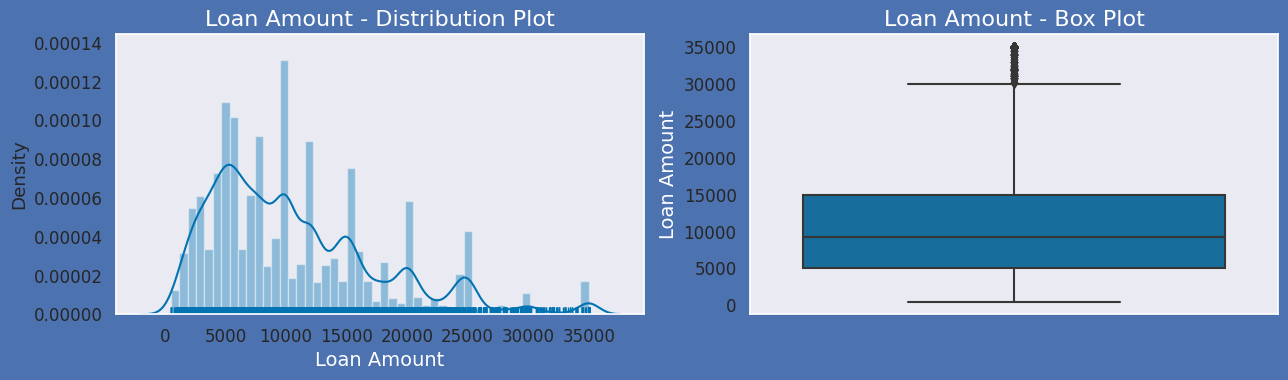

In [ ]:
plt.figure(figsize=(15,8),facecolor='b')
sns.set_style("dark")
# subplot 1
plt.subplot(2, 2, 1)
ax = sns.distplot(data_loan['loan_amnt'],rug = True)
ax.set_title('Loan Amount - Distribution Plot',fontsize=16,color='w')
ax.set_xlabel('Loan Amount',fontsize=14,color='w')
# subplot 2
plt.subplot(2, 2, 2)
ax = sns.boxplot(y=data_loan['loan_amnt'])
ax.set_title('Loan Amount - Box Plot',fontsize=16,color='w')
ax.set_ylabel('Loan Amount',fontsize=14,color='w')
plt.show()

### Observations : Most of the Loan amounts are in range of 5000 - 15000

## Annual Income -Distribution plot

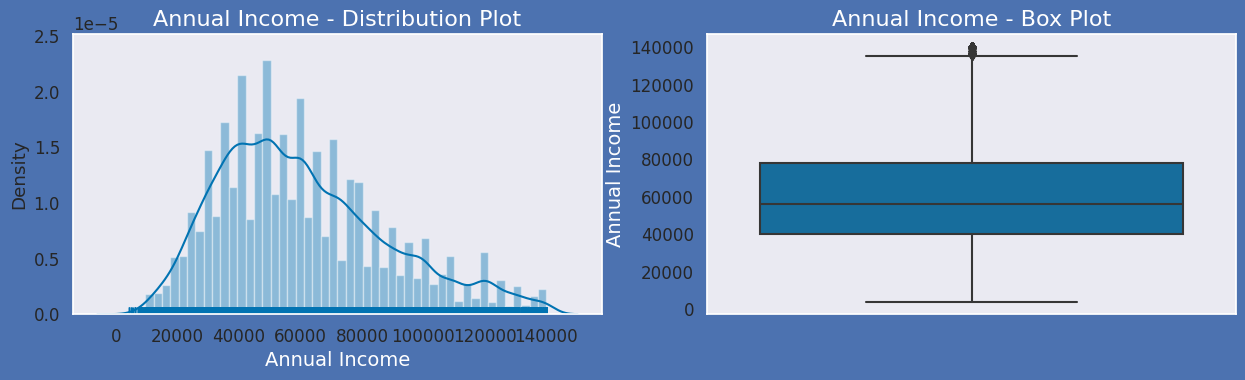

In [ ]:
plt.figure(figsize=(15,8),facecolor='b')
sns.set_style("dark")
# subplot 1
plt.subplot(2, 2, 1)
ax = sns.distplot(data_loan['annual_inc'],rug = True)
ax.set_title('Annual Income - Distribution Plot',fontsize=16,color='w')
ax.set_xlabel('Annual Income',fontsize=14,color='w')
# subplot 2
plt.subplot(2, 2, 2)
plt.title('Annual Income - Box Plot')
ax = sns.boxplot(y=data_loan['annual_inc'])
ax.set_title('Annual Income - Box Plot',fontsize=16,color='w')
ax.set_ylabel('Annual Income',fontsize=14,color='w')
plt.show()

###  Observations : Most of the borrower's Annual incomes are in range of 40000- 80000

# Bivariant Analysis =  Correlation matrix

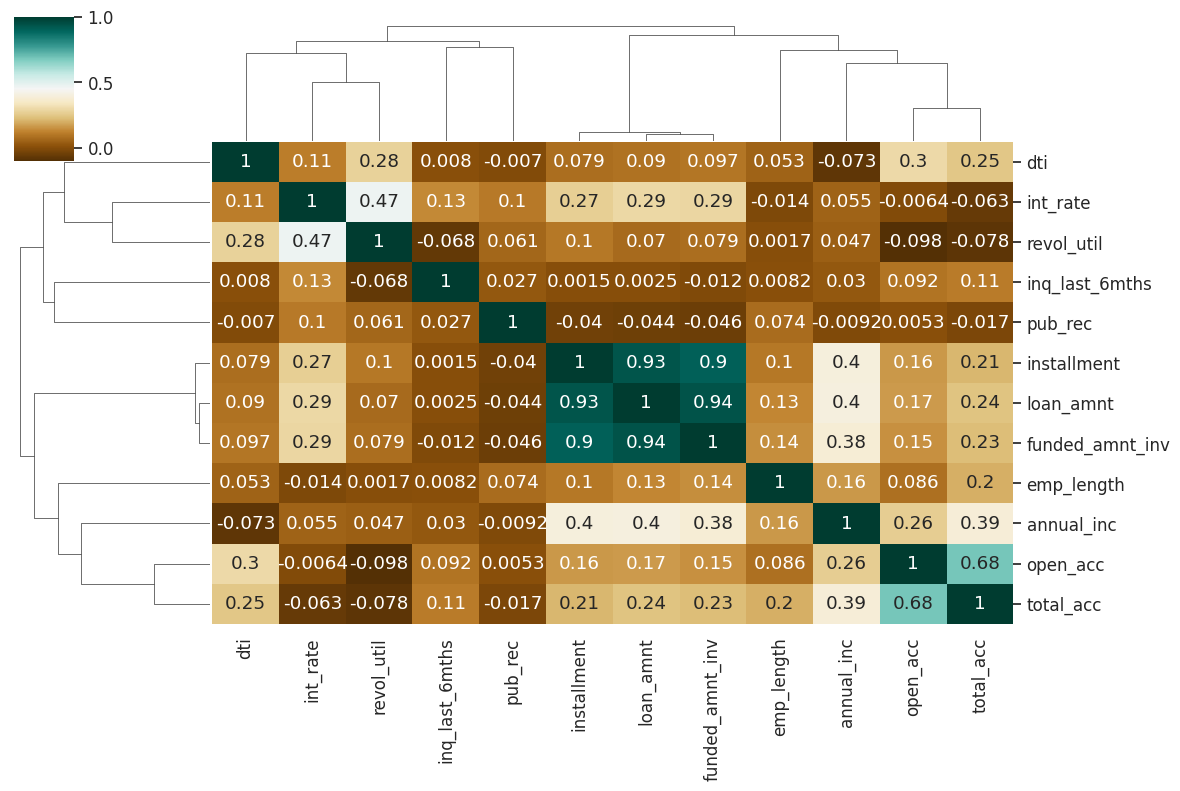

In [ ]:
# Heatmap with Dendogram(clustermap) to show closeness among numerical variables.
loan_correlation = data_loan.corr()
sns.set(font_scale=1.1)
sns.clustermap(loan_correlation,annot=True,figsize=(12, 8),cmap="BrBG")
plt.show()



### Observation :


*   Loan amount, investor amount, funding amount are strongly correlated.
*   Annual income with DTI(Debt-to-income ratio) is negatively correalted.
*   Debt income ratio is the percentage of a consumer's monthly gross income that goes toward paying debts. That means when annual income is low DTI is high & vice versa.

*   Positive correlation between annual income and employment years.That means income increases with work experience


# Univariant Analysis : Visualizing Categorical Data




## Analyzing loan status, grade and sub grade

*   We are analyzing and visualizing only the defaulter data. So subsetting the data while plotting only for 'Charged Off' loan_status for below plots


<Axes: xlabel='loan_status', ylabel='count'>

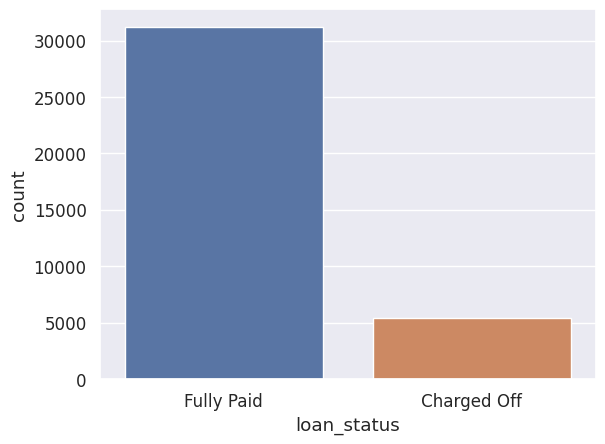

In [ ]:
sns.countplot(x = 'loan_status', data = data_loan)

In [ ]:
data_loan.sub_grade = pd.to_numeric(data_loan.sub_grade.apply(lambda x : x[-1]))
data_loan.sub_grade.head()

0    2
1    4
2    5
3    1
5    4
Name: sub_grade, dtype: int64

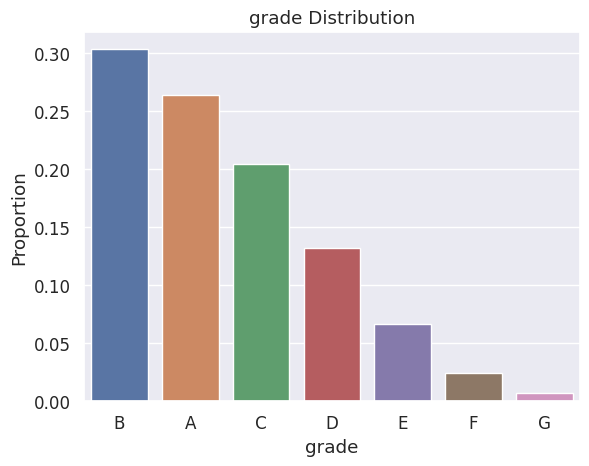

In [ ]:
var = 'grade'
#Probability / Percentage of each values
prob_df = data_loan[var].value_counts(normalize=True).reset_index()

sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')
plt.show()

<Axes: xlabel='grade', ylabel='count'>

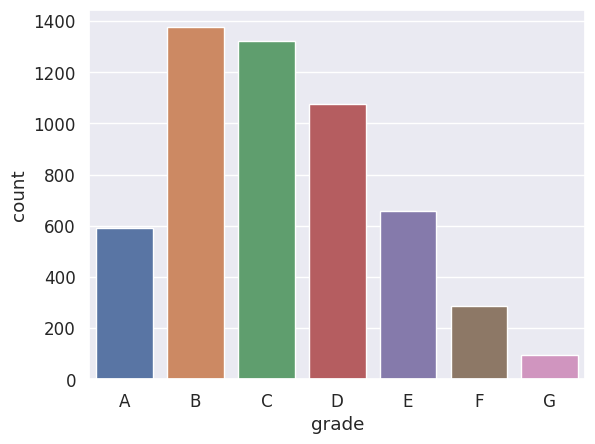

In [ ]:
sns.countplot(x = 'grade', data = data_loan[data_loan.loan_status == 'Charged Off'], order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])


### Analyzing Sub Grade

<Axes: xlabel='grade', ylabel='count'>

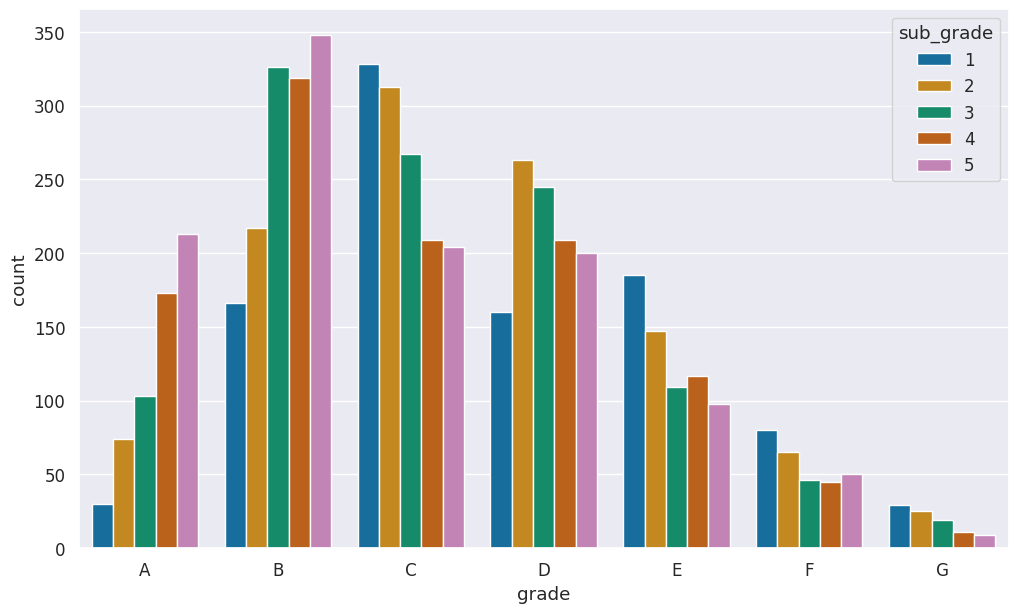

In [ ]:
fig, ax = plt.subplots(figsize=(12,7))
sns.set_palette('colorblind')
sns.countplot(x = 'grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] , hue = 'sub_grade',data = data_loan[data_loan.loan_status == 'Charged Off'])


#### Observations:
Most borrowers fall under B grades and sub grade as 5 are likely to be defaulters



## Analyzing Home_owership

In [ ]:
#checking unique values for home_ownership
data_loan['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

In [ ]:
#replacing 'NONE' with 'OTHERS'
data_loan['home_ownership'].replace(to_replace = ['NONE'],value='OTHER',inplace = True)

In [ ]:
#checking unique values for home_ownership again
data_loan['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

<Axes: xlabel='home_ownership', ylabel='count'>

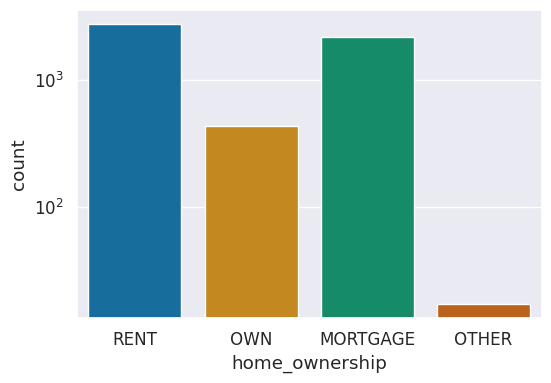

In [ ]:
fig, ax = plt.subplots(figsize = (6,4))
ax.set(yscale = 'log')
sns.countplot(x='home_ownership', data=data_loan[data_loan['loan_status']=='Charged Off'])

 #### Observations :Most of them living in rented home or mortgazed their home.Applicant numbers are high from these categories so charged off is high too.

## Analyzing Purpose

<Axes: xlabel='count', ylabel='purpose'>

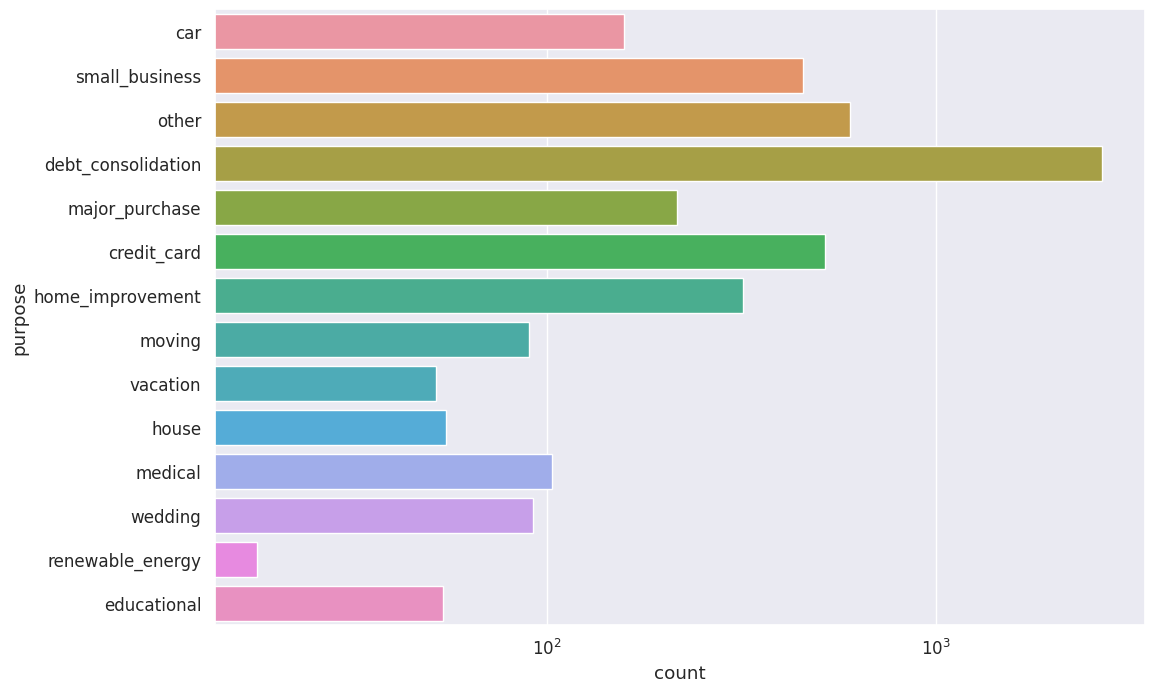

In [ ]:

fig, ax = plt.subplots(figsize = (12,8))
ax.set(xscale = 'log')
sns.countplot(y ='purpose', data=data_loan[data_loan.loan_status == 'Charged Off'])

#### Observations : Most of the loans were taken for the purpose of debt consolidation & paying credit card bill. Number of chraged off count also high too for these loans.

## Analyzing term

<Axes: xlabel='count', ylabel='term'>

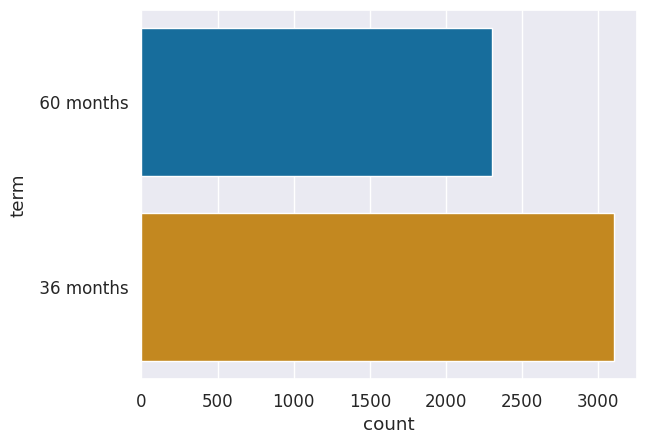

In [ ]:
sns.countplot(y='term', data=data_loan[data_loan['loan_status']=='Charged Off'])

#### Observation : The applicants with term as 36 month are more likely to be defaulters than 60 months applicants

## Analyzing verification status

<Axes: xlabel='verification_status', ylabel='count'>

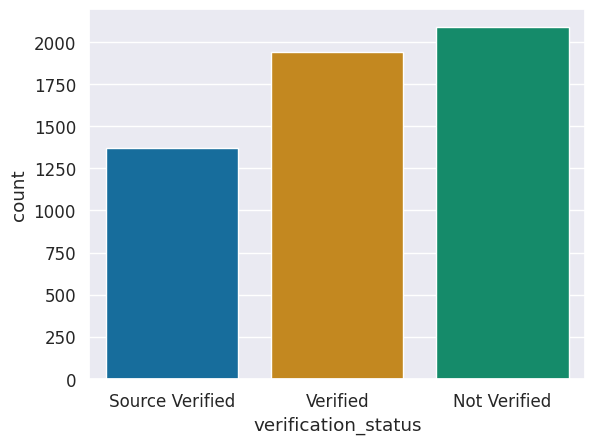

In [ ]:

sns.countplot(x='verification_status', data=data_loan[data_loan['loan_status']=='Charged Off'])

#### Observation : Applicant who are not verified are more likely to be defaulters

# Univariant Analysis - Visualizing Continous variables

## Creating Bins


In [ ]:
#creating bins for int_rate,open_acc,revol_util,total_acc
data_loan['int_rate_groups'] = pd.cut(data_loan['int_rate'], bins=5,precision =0,labels=['5%-9%','9%-13%','13%-17%','17%-21%','21%-24%'])
data_loan['open_acc_groups'] = pd.cut(data_loan['open_acc'],bins = 5,precision =0,labels=['2-10','10-19','19-27','27-36','36-44'])
data_loan['revol_util_groups'] = pd.cut(data_loan['revol_util'], bins=5,precision =0,labels=['0-20','20-40','40-60','60-80','80-100'])
data_loan['total_acc_groups'] = pd.cut(data_loan['total_acc'], bins=5,precision =0,labels=['2-20','20-37','37-55','55-74','74-90'])
data_loan['annual_inc_groups'] = pd.cut(data_loan['annual_inc'], bins=5,precision =0,labels =['3k-31k','31k-58k','58k-85k','85k-112k','112k-140k'])


In [ ]:
# Viewing new bins created
data_loan.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,int_rate_groups,open_acc_groups,revol_util_groups,total_acc_groups,annual_inc_groups
0,5000,4975.0,36 months,10.65,162.87,B,2,10,RENT,24000.0,...,1,3,0,83.7,9,9%-13%,2-10,80-100,2-20,3k-31k
1,2500,2500.0,60 months,15.27,59.83,C,4,0,RENT,30000.0,...,5,3,0,9.4,4,13%-17%,2-10,0-20,2-20,3k-31k
2,2400,2400.0,36 months,15.96,84.33,C,5,10,RENT,12252.0,...,2,2,0,98.5,10,13%-17%,2-10,80-100,2-20,3k-31k
3,10000,10000.0,36 months,13.49,339.31,C,1,10,RENT,49200.0,...,1,10,0,21.0,37,13%-17%,2-10,20-40,20-37,31k-58k
5,5000,5000.0,36 months,7.90,156.46,A,4,3,RENT,36000.0,...,3,9,0,28.3,12,5%-9%,2-10,20-40,2-20,31k-58k


## Analyzing interest rate wrt the interest rate bins created

Text(0.5, 0, 'Interest Rate')

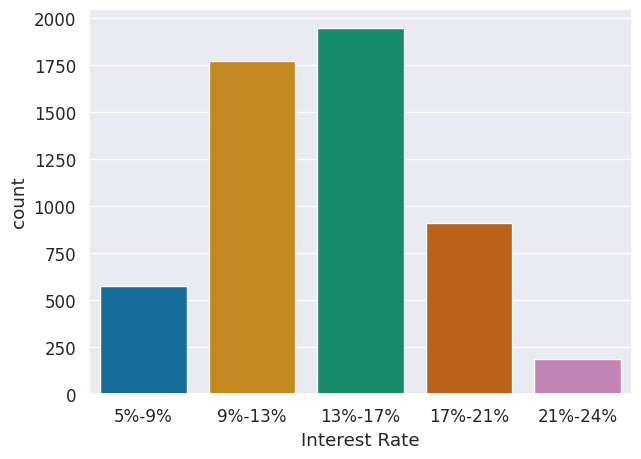

In [ ]:
fig, ax = plt.subplots(figsize = (7,5))
sns.countplot(x='int_rate_groups', data=data_loan[data_loan.loan_status == 'Charged Off'])
plt.xlabel('Interest Rate')


#### Observation : Applicants who receive interest at the rate of 13-17% are more likely to be defaulters

## Analyzing Employee year of experience

<Axes: xlabel='emp_length', ylabel='count'>

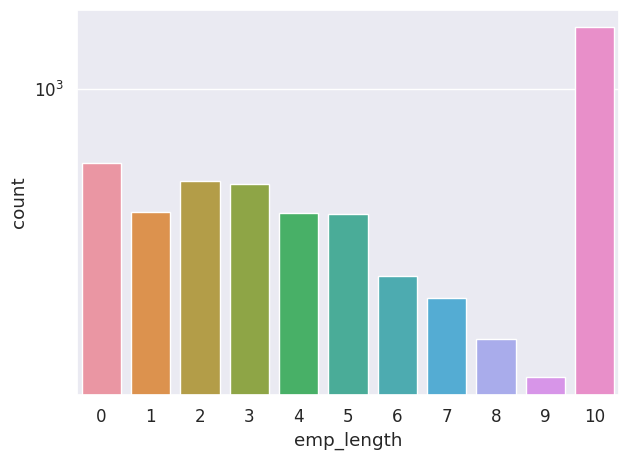

In [ ]:
fig, ax = plt.subplots(figsize = (7,5))
ax.set_yscale('log')
sns.countplot(x='emp_length', data=data_loan[data_loan.loan_status == 'Charged Off'])

#### Observation : Employee having more year of experience greater than 10 years are more like to default loan

## Analyzing open_acc

<Axes: xlabel='open_acc_groups', ylabel='count'>

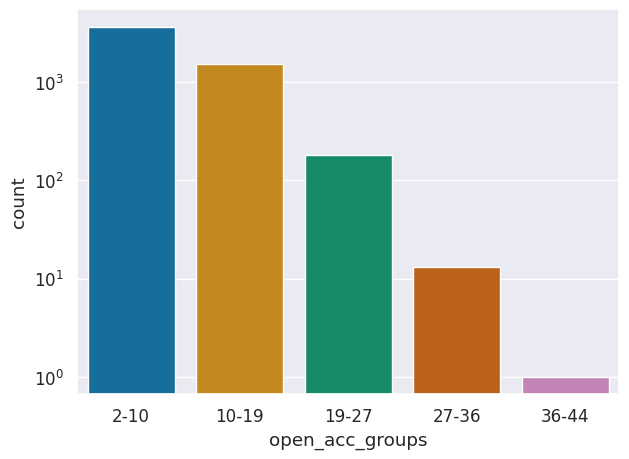

In [ ]:

fig, ax = plt.subplots(figsize = (7,5))
ax.set_yscale('log')
sns.countplot(x='open_acc_groups', data=data_loan[data_loan.loan_status == 'Charged Off'])



#### Observation : Applicants who have 2-10 open_acc are more likely to be defaulters

## Analyzing revol_util

<Axes: xlabel='revol_util_groups', ylabel='count'>

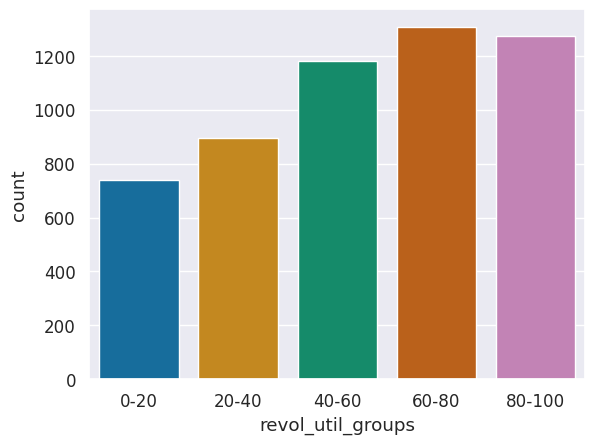

In [ ]:
sns.countplot(x='revol_util_groups', data=data_loan[data_loan.loan_status == 'Charged Off'])

#### Observation : Applicant having revol_util in range of 60 -80 are more likely to be defaulters

## Analyzing total_acc

<Axes: xlabel='total_acc_groups', ylabel='count'>

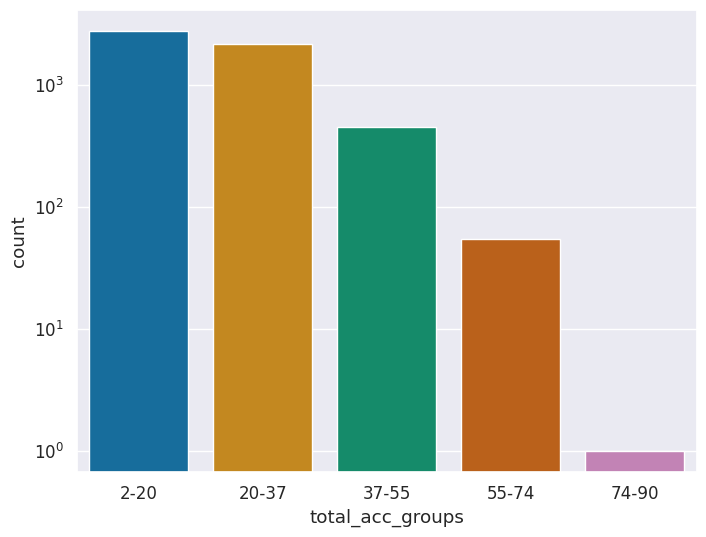

In [ ]:
fig, ax = plt.subplots(figsize = (8,6))
ax.set_yscale('log')
sns.countplot(x='total_acc_groups', data=data_loan[data_loan.loan_status == 'Charged Off'])

#### Observations : Applicants with total account in range of 2-20 are more likely to be defaulters

## Analyzing annual_inc

<Axes: xlabel='annual_inc_groups', ylabel='count'>

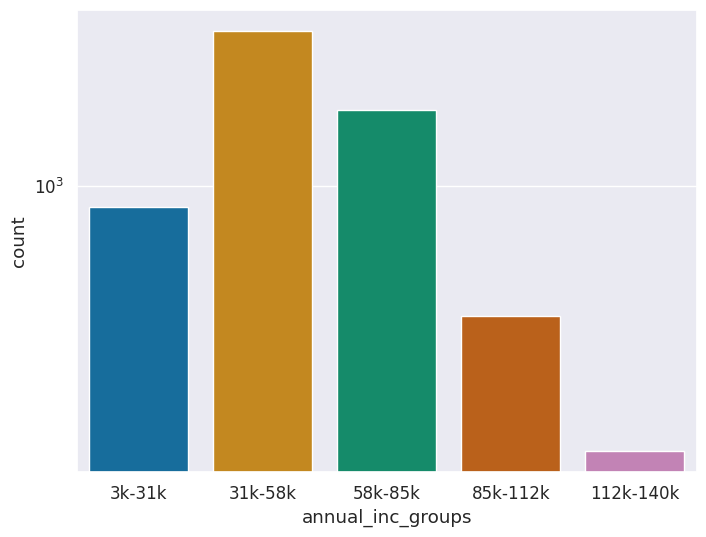

In [ ]:
fig, ax = plt.subplots(figsize = (8,6))
ax.set_yscale('log')
sns.countplot(x='annual_inc_groups', data=data_loan[data_loan.loan_status == 'Charged Off'])

#### Observation : Applicants with annual income in range of 31k to 58k are more likely to be defaulters

## Analyzing inquire in last 6 months

<Axes: xlabel='inq_last_6mths', ylabel='count'>

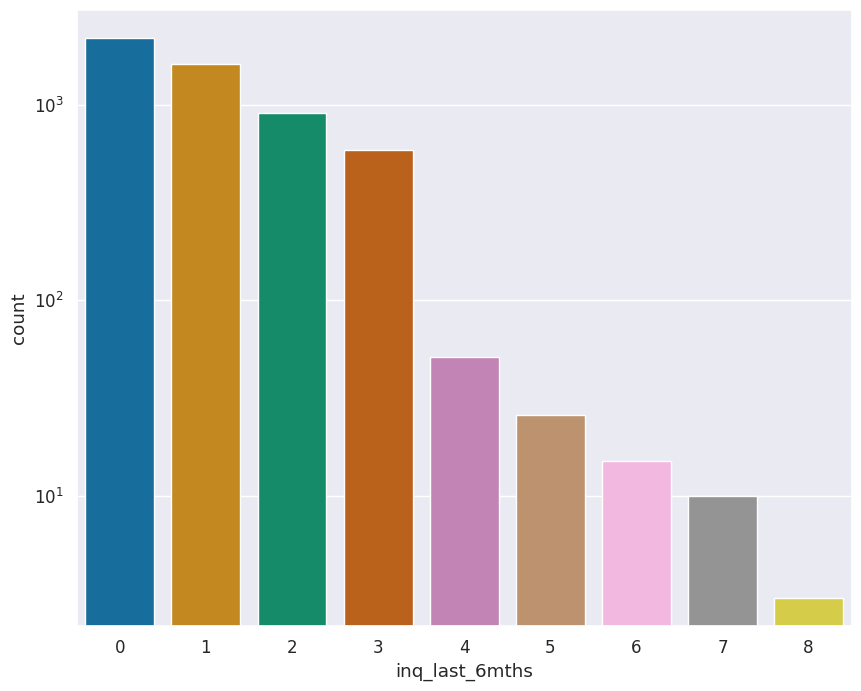

In [ ]:
fig,ax = plt.subplots(figsize = (10,8))
ax.set_yscale('log')
sns.countplot(x='inq_last_6mths', data=data_loan[data_loan['loan_status']=='Charged Off'])

#### Observation : Applicants are more likely to be defaulters When the no of enquiries in last 6 months is 0

## Analyzing pub rec

<Axes: xlabel='pub_rec', ylabel='count'>

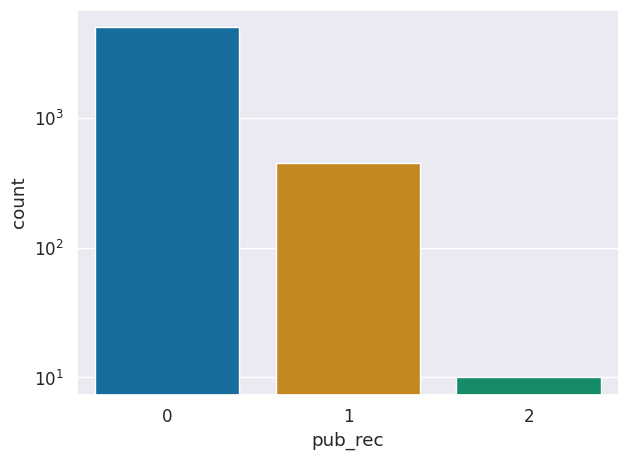

In [ ]:

fig,ax = plt.subplots(figsize = (7,5))
ax.set_yscale('log')
sns.countplot(x='pub_rec', data=data_loan[data_loan['loan_status']=='Charged Off'])

#### Observation Applicants having number of derogatory public records is 0 are more likely to be defaulters

## Analyzing by issued month and year

In [ ]:
data_loan.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,int_rate_groups,open_acc_groups,revol_util_groups,total_acc_groups,annual_inc_groups
0,5000,4975.0,36 months,10.65,162.87,B,2,10,RENT,24000.0,...,1,3,0,83.7,9,9%-13%,2-10,80-100,2-20,3k-31k
1,2500,2500.0,60 months,15.27,59.83,C,4,0,RENT,30000.0,...,5,3,0,9.4,4,13%-17%,2-10,0-20,2-20,3k-31k
2,2400,2400.0,36 months,15.96,84.33,C,5,10,RENT,12252.0,...,2,2,0,98.5,10,13%-17%,2-10,80-100,2-20,3k-31k
3,10000,10000.0,36 months,13.49,339.31,C,1,10,RENT,49200.0,...,1,10,0,21.0,37,13%-17%,2-10,20-40,20-37,31k-58k
5,5000,5000.0,36 months,7.90,156.46,A,4,3,RENT,36000.0,...,3,9,0,28.3,12,5%-9%,2-10,20-40,2-20,31k-58k


In [ ]:
## Extracting month and year
df_month_year = data_loan['issue_d'].str.partition("-", True)
data_loan['issue_month']=df_month_year[0]
data_loan['issue_year']='20' + df_month_year[2]

In [ ]:
data_loan.head(10)

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,pub_rec,revol_util,total_acc,int_rate_groups,open_acc_groups,revol_util_groups,total_acc_groups,annual_inc_groups,issue_month,issue_year
0,5000,4975.0,36 months,10.65,162.87,B,2,10,RENT,24000.0,...,0,83.7,9,9%-13%,2-10,80-100,2-20,3k-31k,Dec,2011
1,2500,2500.0,60 months,15.27,59.83,C,4,0,RENT,30000.0,...,0,9.4,4,13%-17%,2-10,0-20,2-20,3k-31k,Dec,2011
2,2400,2400.0,36 months,15.96,84.33,C,5,10,RENT,12252.0,...,0,98.5,10,13%-17%,2-10,80-100,2-20,3k-31k,Dec,2011
3,10000,10000.0,36 months,13.49,339.31,C,1,10,RENT,49200.0,...,0,21.0,37,13%-17%,2-10,20-40,20-37,31k-58k,Dec,2011
5,5000,5000.0,36 months,7.90,156.46,A,4,3,RENT,36000.0,...,0,28.3,12,5%-9%,2-10,20-40,2-20,31k-58k,Dec,2011
6,7000,7000.0,60 months,15.96,170.08,C,5,8,RENT,47004.0,...,0,85.6,11,13%-17%,2-10,80-100,2-20,31k-58k,Dec,2011
7,3000,3000.0,36 months,18.64,109.43,E,1,9,RENT,48000.0,...,0,87.5,4,17%-21%,2-10,80-100,2-20,31k-58k,Dec,2011
8,5600,5600.0,60 months,21.28,152.39,F,2,4,OWN,40000.0,...,0,32.6,13,21%-24%,10-19,20-40,2-20,31k-58k,Dec,2011
9,5375,5350.0,60 months,12.69,121.45,B,5,0,RENT,15000.0,...,0,36.5,3,9%-13%,2-10,20-40,2-20,3k-31k,Dec,2011
10,6500,6500.0,60 months,14.65,153.45,C,3,5,OWN,72000.0,...,0,20.6,23,13%-17%,10-19,20-40,20-37,58k-85k,Dec,2011


<Axes: xlabel='issue_year', ylabel='count'>

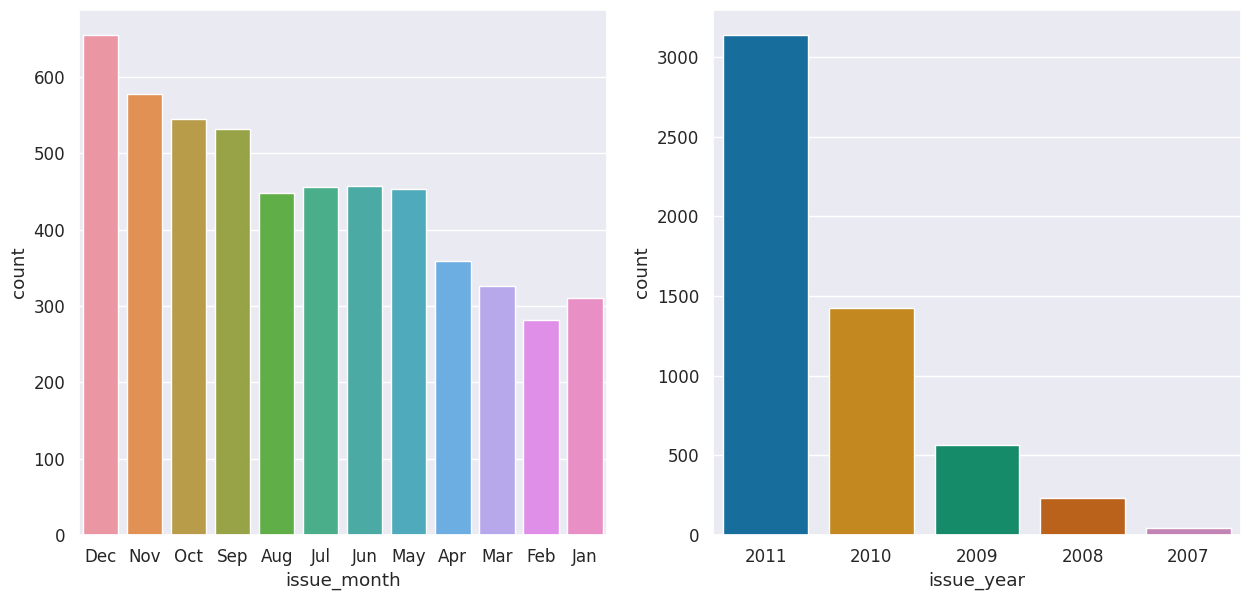

In [ ]:
#Ploting the graph for issue_month and issue-year
plt.figure(figsize=(15,15))
plt.subplot(221)
sns.countplot(x='issue_month', data=data_loan[data_loan['loan_status']=='Charged Off'])
plt.subplot(222)
sns.countplot(x='issue_year', data=data_loan[data_loan['loan_status']=='Charged Off'])

#### Observation :  Maximum number of defaults occured when the loan was sanctioned/issued in Dec. Loan issued in the year 2011 were also as compared to other years


 ## Creating bins for analyzing installment,dti, loan_amnt

In [ ]:
data_loan['installment_groups'] = pd.cut(data_loan['installment'], bins=10,precision =0,labels=['14-145','145-274','274-403','403-531','531-660','660-789','789-918','918-1047','1047-1176','1176-1305'])
data_loan['funded_amnt_inv_group'] = pd.cut(data_loan['funded_amnt_inv'], bins=7,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k']) ## bin is starting from -35?
data_loan['loan_amnt_groups'] = pd.cut(data_loan['loan_amnt'], bins=7,precision =0,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])
data_loan['dti_groups'] = pd.cut(data_loan['dti'], bins=5,precision =0,labels=['0-6','6-12','12-18','18-24','24-30'])


## Analyzing funded amount investment

<Axes: xlabel='funded_amnt_inv_group', ylabel='count'>

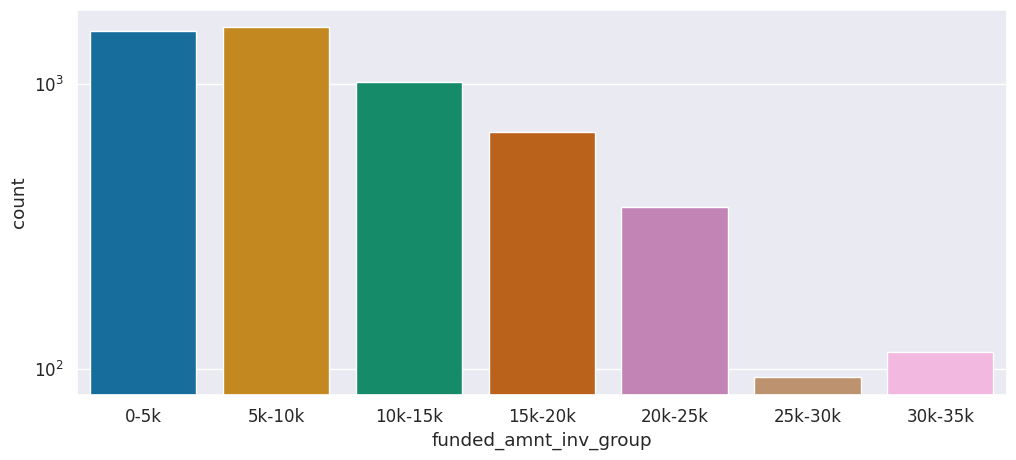

In [ ]:
fig,ax = plt.subplots(figsize = (12,5))
ax.set_yscale('log')
sns.countplot(x='funded_amnt_inv_group', data=data_loan[data_loan['loan_status']=='Charged Off'])

#### Observation : When funded amount by investor is between 5000-10000 applicants are more likely to be defaulters

## Analyzing loan amount

<Axes: xlabel='loan_amnt_groups', ylabel='count'>

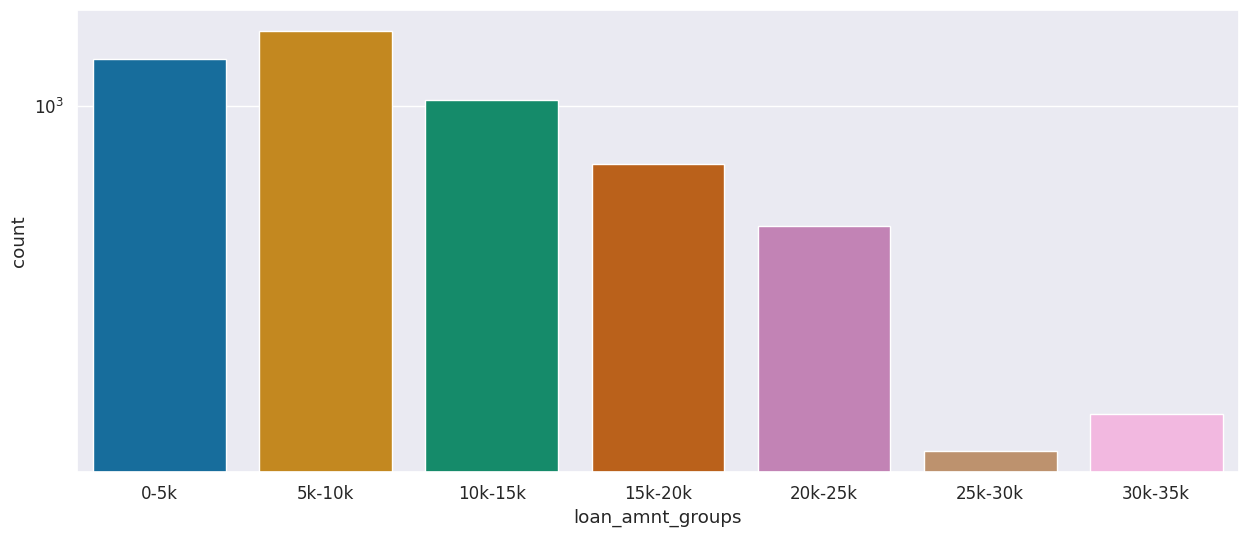

In [ ]:
fig,ax = plt.subplots(figsize = (15,6))
ax.set_yscale('log')
sns.countplot(x='loan_amnt_groups', data=data_loan[data_loan['loan_status']=='Charged Off'])

#### Observation : Loan amount is between 5429 - 10357 applicants are more likely to be defaulters

## Analyzing dti

<Axes: xlabel='dti_groups', ylabel='count'>

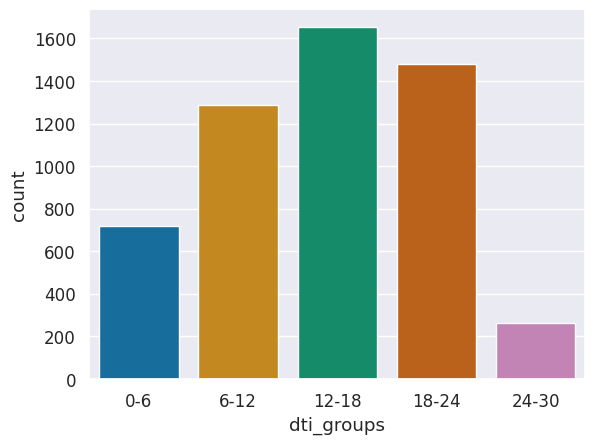

In [ ]:
sns.countplot(x='dti_groups', data=data_loan[data_loan['loan_status']=='Charged Off'])

#### Observation : Dti is between 12-18 applicants are more likely to be defaulters

## Analyzing installments

<Axes: xlabel='installment_groups', ylabel='count'>

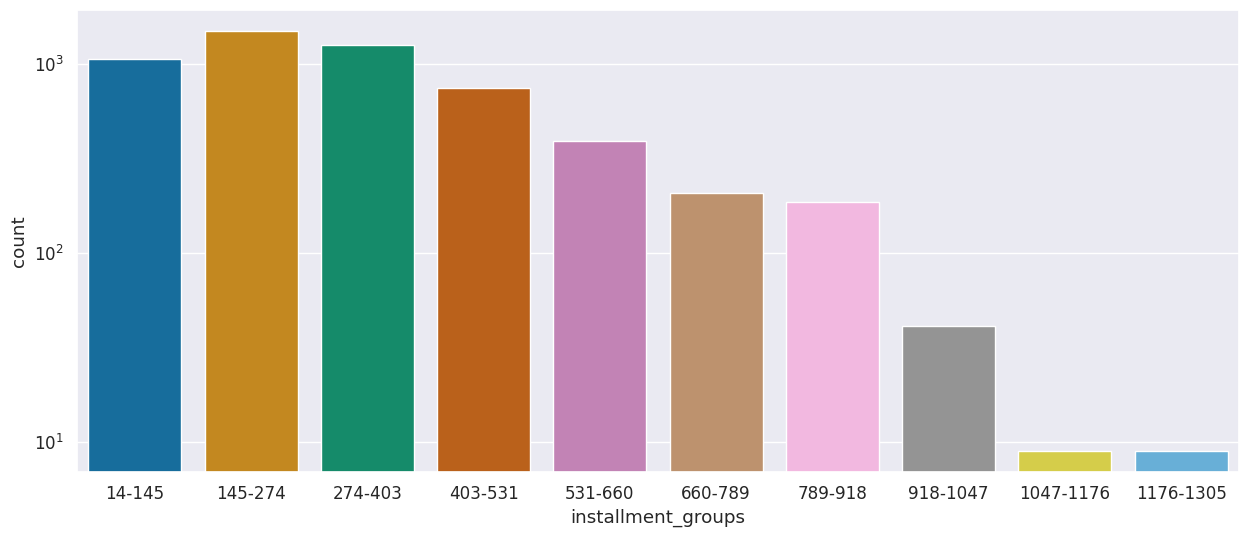

In [ ]:
fig,ax = plt.subplots(figsize = (15,6))
ax.set_yscale('log')
sns.countplot(x='installment_groups', data=data_loan[data_loan['loan_status']=='Charged Off'])

#### Observation : When monthly installments are between 145-274 applicants are more likely to be defaulters

# Bivariant analysis



## Analysing annual income with other columns for more insights




### 1.Annual income vs loan purpose

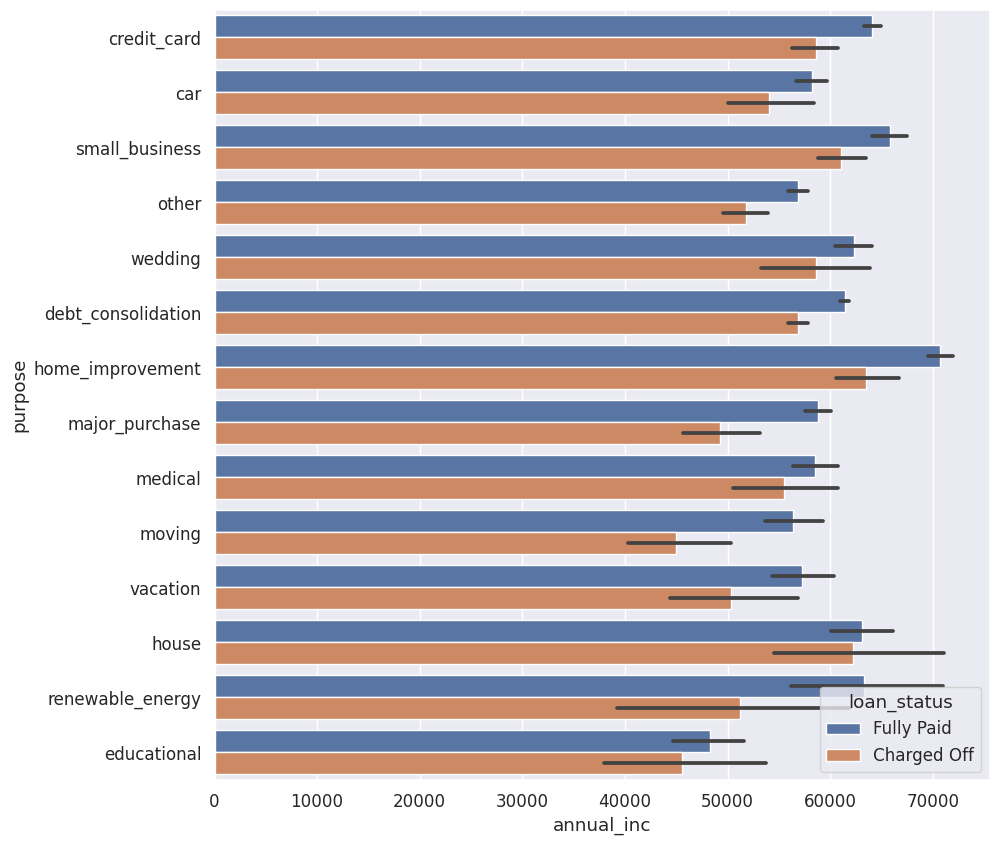

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(data =data_loan,x='annual_inc', y='purpose', hue ='loan_status',palette="deep")
plt.show()

#### Observation:
 Though the number of loans applied and defaulted are the highest in number for "debt_consolation", the annual income of those who applied isn't the highest.


*   Applicants with higher salary mostly applied loans for "home_improvment", "house", "renewable_energy" and "small_businesses"


Applicants taking loan for 'home improvement' and have income of 60k -70k are more likely to be defaulters






### 2.Annual income vs home ownership

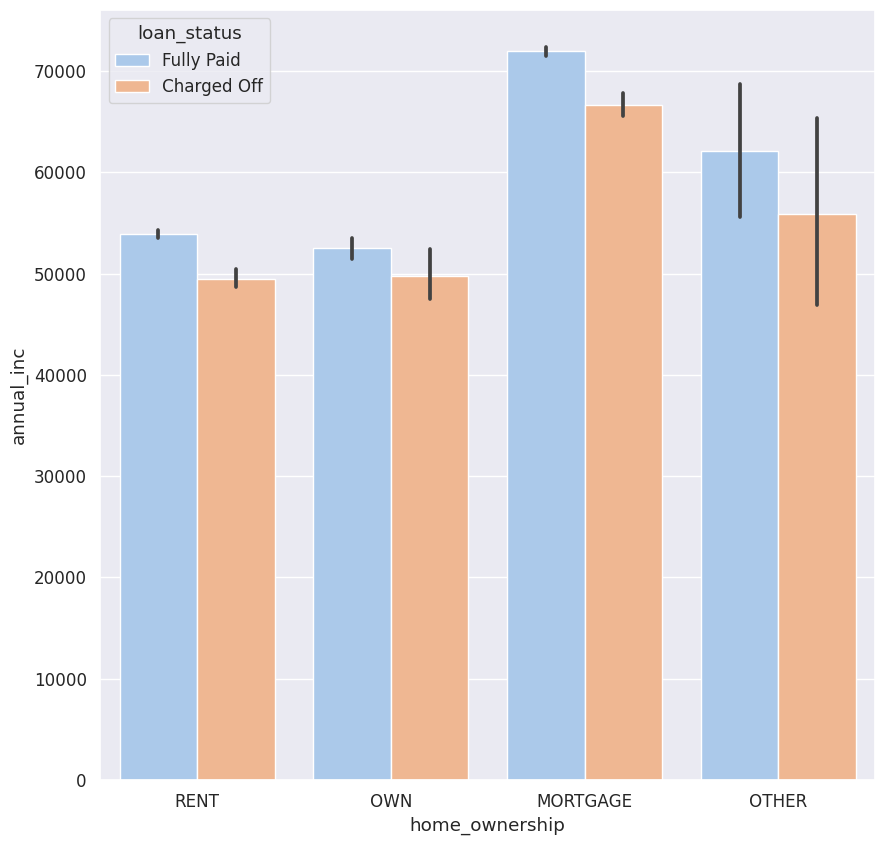

In [ ]:

plt.figure(figsize=(10,10))
sns.barplot(data =data_loan,x='home_ownership', y='annual_inc', hue ='loan_status',palette="pastel")
plt.show()

#### Observation : Applicants whose home ownership is 'MORTGAGE and have income of 60-70k are more likely to be defaulters

### 3.Annual Income vs Loan amount

<Axes: xlabel='annual_inc_groups', ylabel='loan_amnt'>

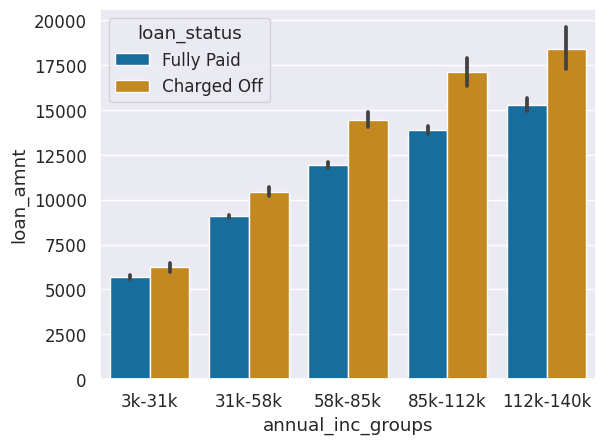

In [ ]:
sns.barplot(x = "annual_inc_groups", y = "loan_amnt", hue = 'loan_status', data = data_loan)

#### Observation: Across all the income groups, the loan_amount is higher for people who defaulted.


### 4.Annual income vs int_rate

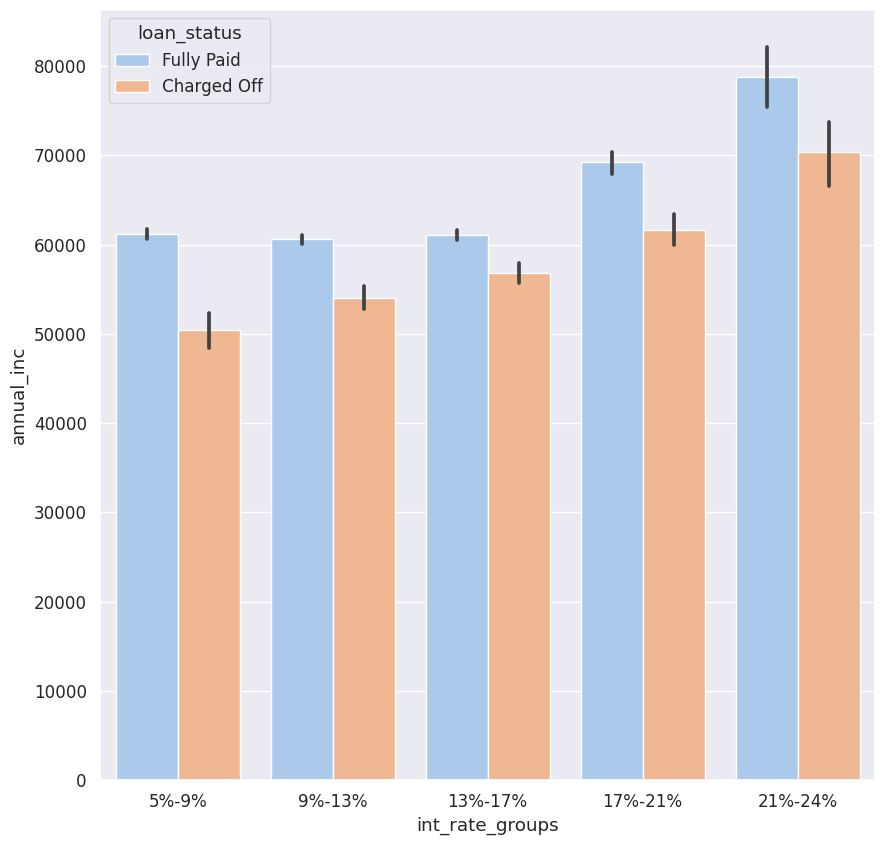

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(data =data_loan,x='int_rate_groups', y='annual_inc', hue ='loan_status',palette="pastel")
plt.show()

#### Observation : Applicants who receive interest at the rate of 21-24% and have an income of 70k-80k are more likely to be defaulters

## Analysing loan_amount with other columns for more insights


###1.Loan Amount vs Interest Rate

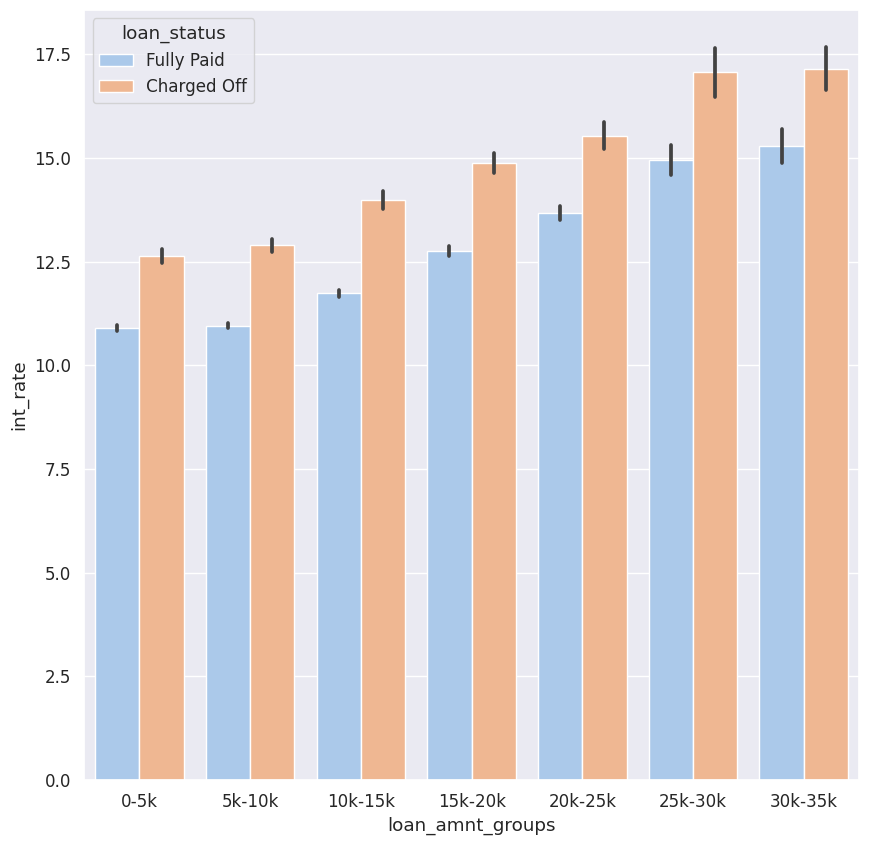

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(data =data_loan,x='loan_amnt_groups', y='int_rate', hue ='loan_status',palette="pastel")
plt.show()

#### Observation : Applicants who have taken a loan in the range 30k - 35k and are charged interest rate of 15-17.5 % are more likely to be defaulters.

###2.Loan vs Loan purpose

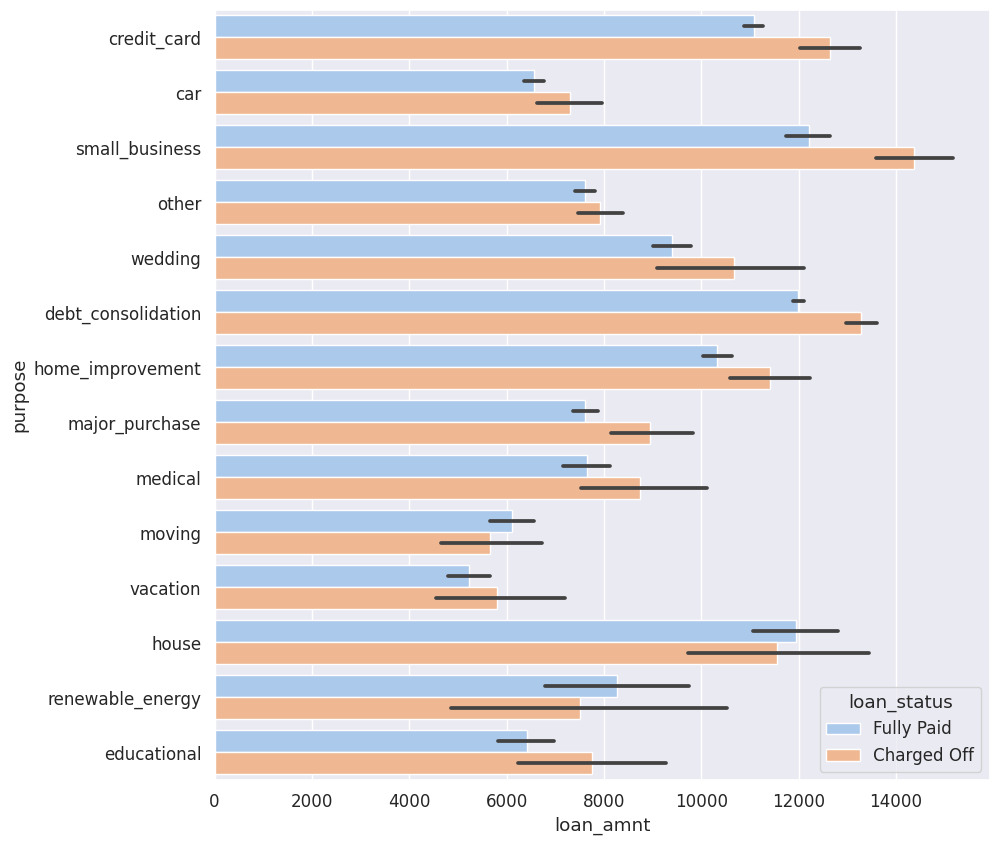

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(data =data_loan,x='loan_amnt', y='purpose', hue ='loan_status',palette="pastel")
plt.show()

#### Observation: Applicants who have taken a loan for small business and the loan amount is greater than 14k are more likely to be defaulters

### 3.Loan vs House Ownership

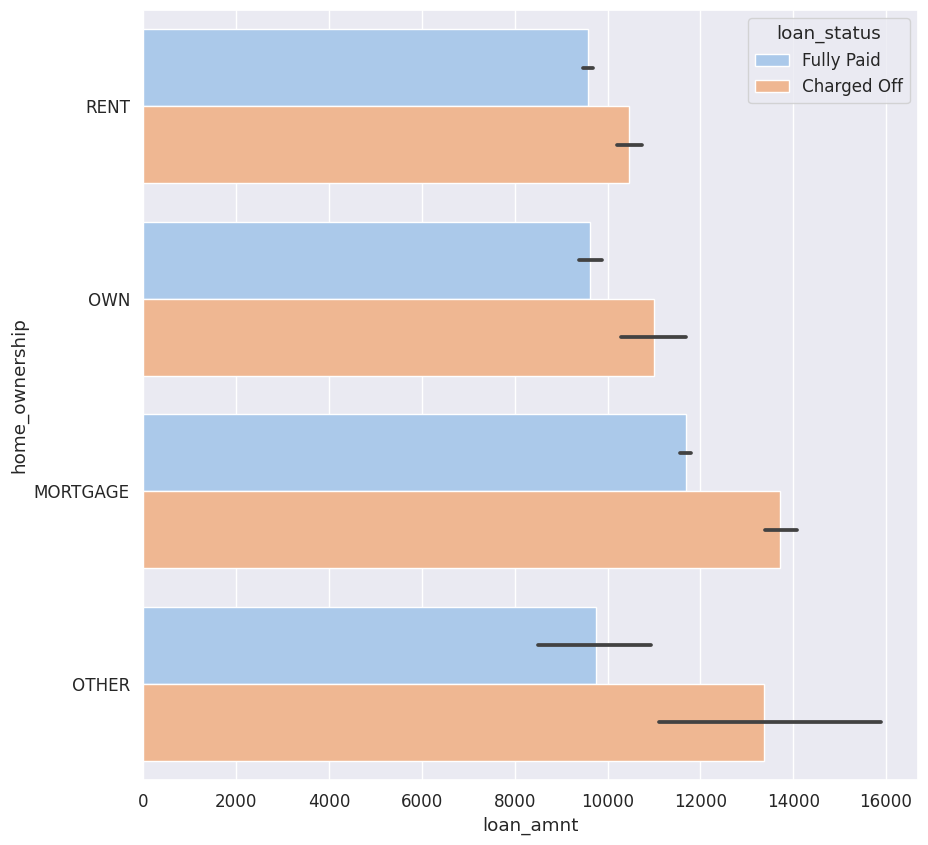

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(data =data_loan,x='loan_amnt', y='home_ownership', hue ='loan_status',palette="pastel")
plt.show()

#### Observation : Applicants whose home ownership is 'MORTGAGE and have loan of 14-16k are most likely to be deafulters

### 4.Loan amount vs month issued and year issued

<Axes: xlabel='issue_year', ylabel='loan_amnt'>

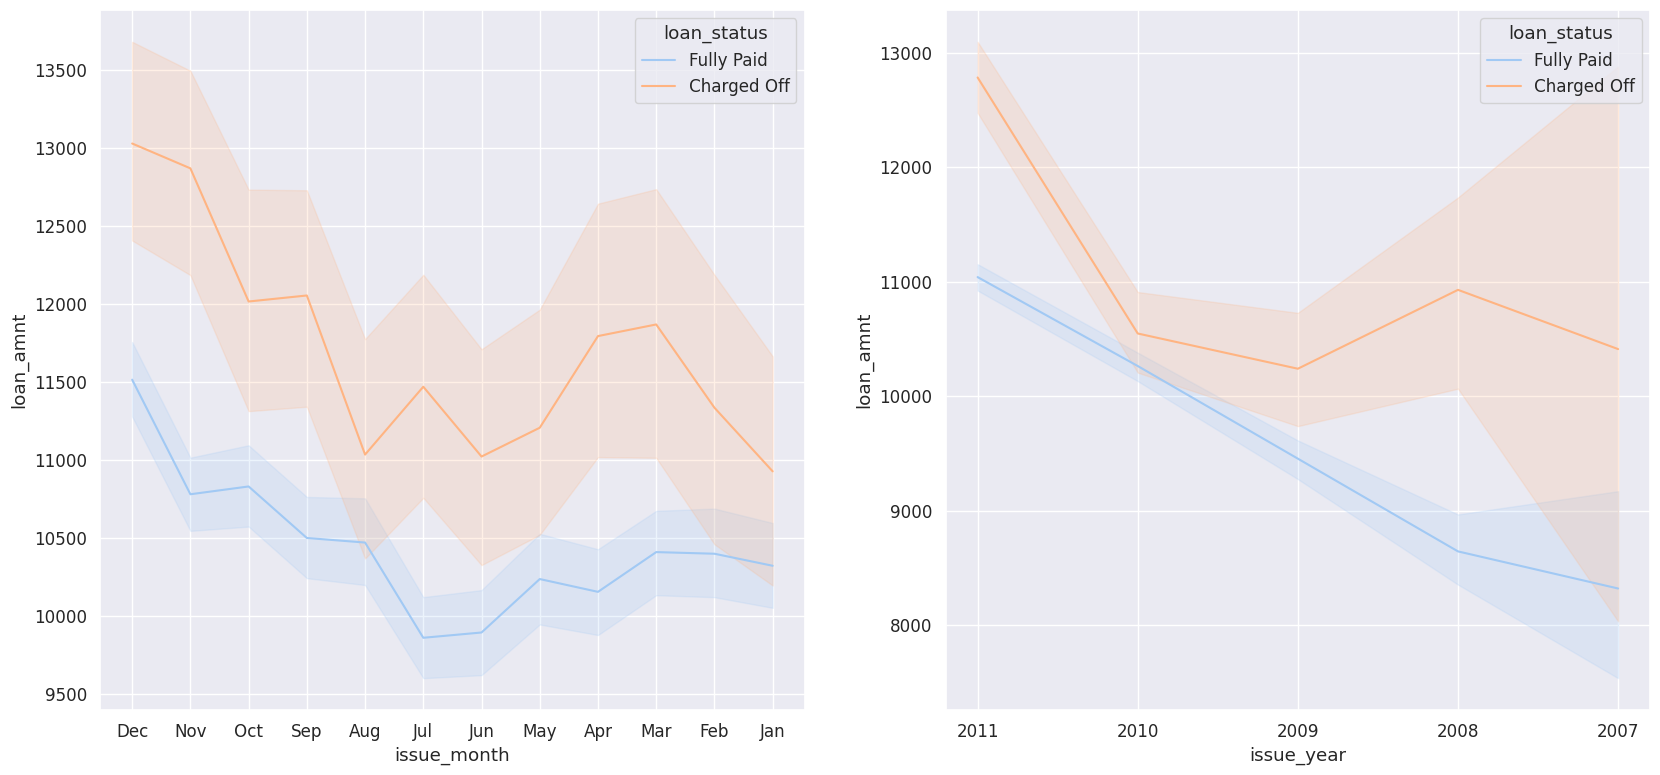

In [ ]:
plt.figure(figsize=(20,20))
plt.subplot(221)
sns.lineplot(data =data_loan,y='loan_amnt', x='issue_month', hue ='loan_status',palette="pastel")
plt.subplot(222)
sns.lineplot(data =data_loan,y='loan_amnt', x='issue_year', hue ='loan_status',palette="pastel")

###  5.Loan amount vs Grade

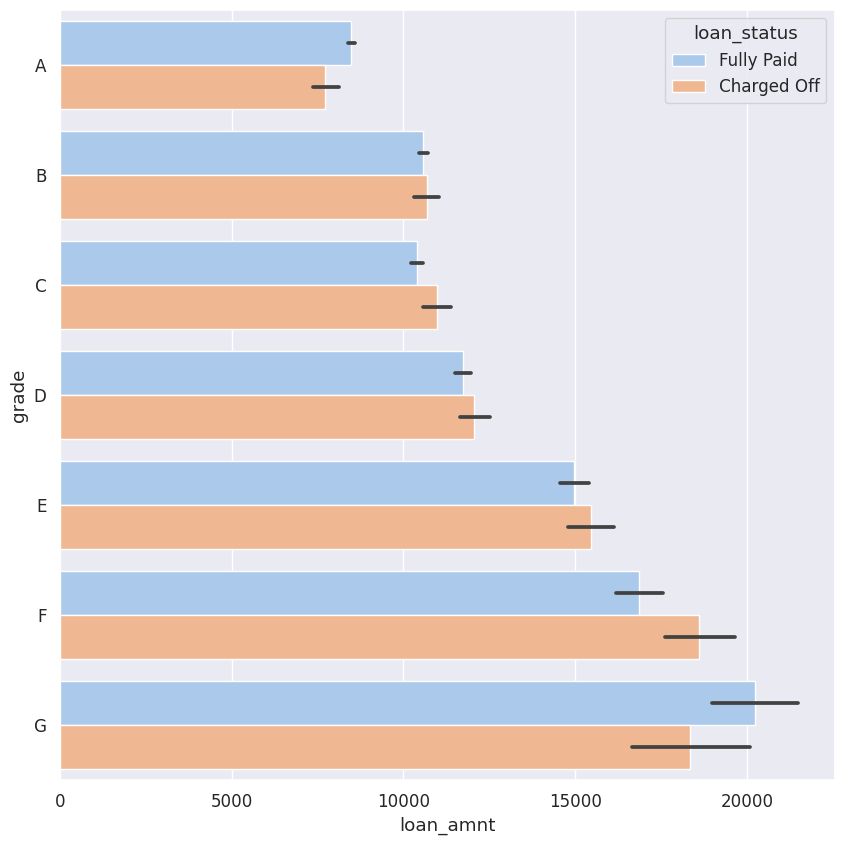

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(data =data_loan,x='loan_amnt', y='grade', hue ='loan_status',palette="pastel", order=['A','B','C','D','E','F','G'])
plt.show()

#### Observation: When grade is F and loan amount is between 15k-20k are more likely to be defaulters

### 6.Loan amount vs emp_length and verification status

<Axes: xlabel='verification_status', ylabel='loan_amnt'>

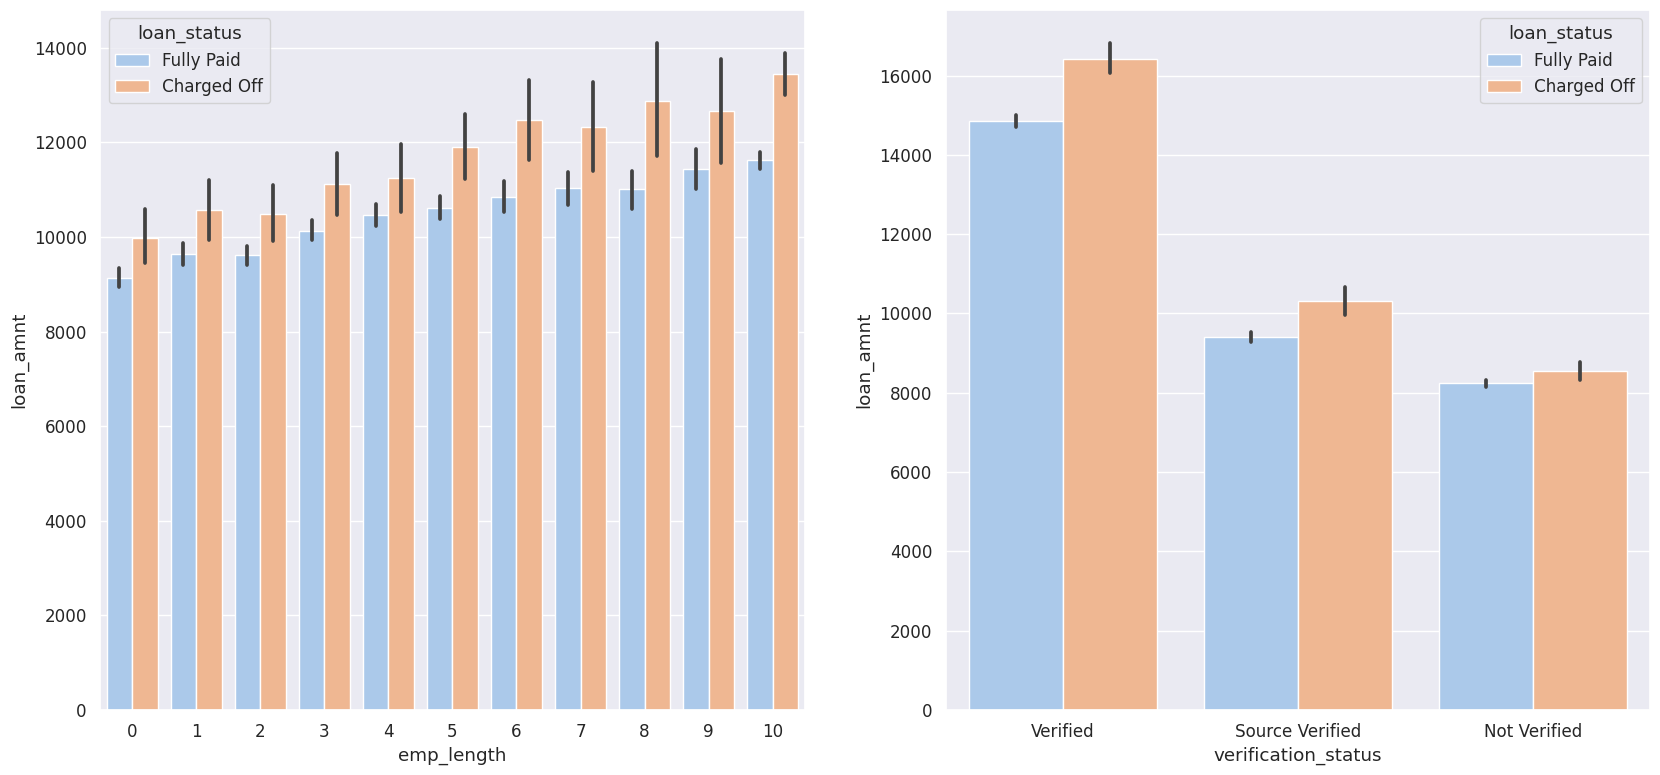

In [ ]:
plt.figure(figsize=(20,20))
plt.subplot(221)
sns.barplot(data =data_loan,y='loan_amnt', x='emp_length', hue ='loan_status',palette="pastel")
plt.subplot(222)
sns.barplot(data =data_loan,y='loan_amnt', x='verification_status', hue ='loan_status',palette="pastel")

#### Observation: Employees with longer working history got the loan approved for a higher amount.

*   Looking at the verification status data, verified loan applications tend to have higher loan amount. Which might indicate that the firms are first verifying the loans with higher values.

When employment length is 10yrs and loan amount is 12k-14k and When the loan is verified and loan amount is above 16k are more likely to be defaulters


### Analyzing Grade vs interest rate

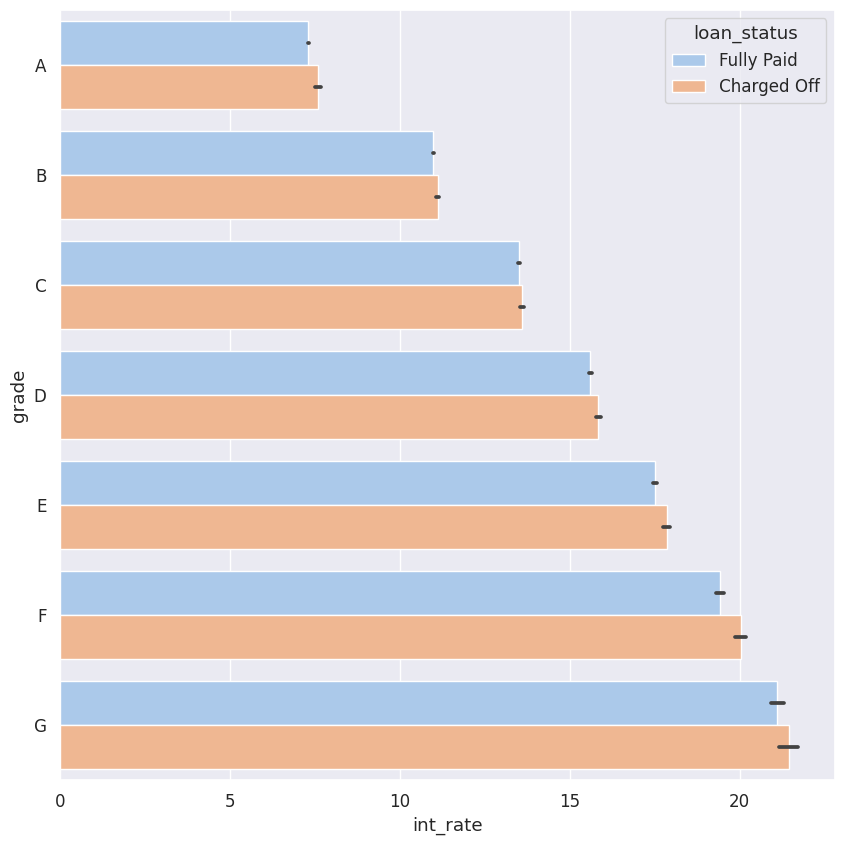

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(data =data_loan,x='int_rate', y='grade', hue ='loan_status',palette="pastel", order=['A','B','C','D','E','F','G'])
plt.show()


#### Observation : For grade G and interest rate above 20% are more likely to be defaulters

### 6.Loan Amount vs int_rate

<Figure size 640x480 with 0 Axes>

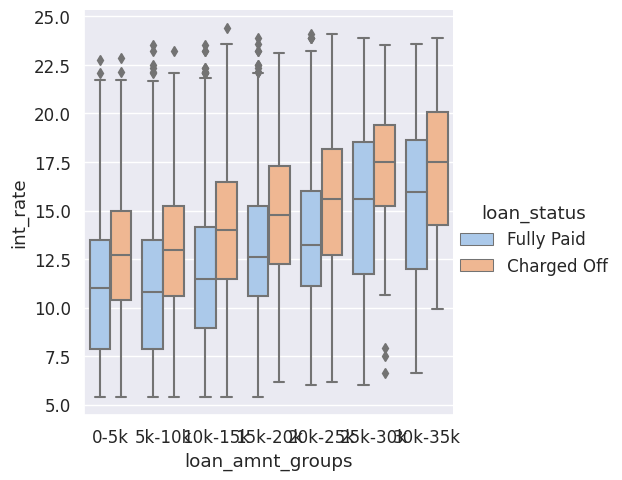

In [ ]:
# fig,ax = plt.subplots(figsize = (15,6))
plt.tight_layout()
sns.catplot(data =data_loan,y ='int_rate', x ='loan_amnt_groups', hue ='loan_status',palette="pastel",kind = 'box')

#### Observation:  The interest rate for charged off loans is pretty high than that of fully paid loans in all the loan_amount groups.



*   This can be a pretty strong driving factor for loan defaulting.




### 7.Loan amount vs term

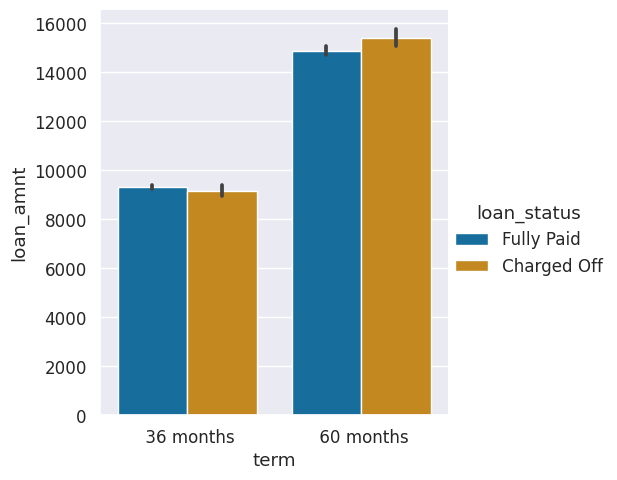

In [ ]:
sns.catplot(x = 'term', y = 'loan_amnt', data = data_loan,hue = 'loan_status', kind = 'bar')

#### Observation:  Applicants who applied and defaulted have no significant difference in loan_amounts


*   Which means that applicants applying for long term has applied for more loan.




# Conclusion



*   Major driving factors for to predict chance of defaulters are grades, verification status, annual income, DTI, pub_rec
*   Other factors such as borrowers having annual income in the range 50000-100000, Burrowers with working experience 10+ years are more likely to be defaulters.


*   Increased interest rate is a strong factor for deafulting loan amount.



